## NELA-GT-2018: A Large Multi-Labelled News Dataset for the Study of Misinformation in News Articles". (2019-01-15)

- Name: Sudha Amarnath
- Student ID: 013709956


#### **Business Problem / Data narrative**
News, Fake News, Misinformation Classification Selected on 194 sources in the NELA-GT-2018 dataset.
A number of organizations and platforms have developed methods for assessing reliability and bias of news sources. These organizations come from both the research community and from practitioner communities. While each of these organizations and platforms provide useful assessments on their own, each uses different criteria and methods to make their assessments, and most of these assessments cover relatively few sources. Thus, in order to create a large, centralized set of veracity labels, the collected ground truth (GT) data from eight different sites, which all attempt to assess the reliability and/or the bias of news.
These assessment sites are:
1. NewsGuard
2. Pew Research Center
3. Wikipedia
4. OpenSources
5. Media Bias/Fact Check (MBFC)
6. AllSides
7. BuzzFeed News
8. Politifact<br>Based on the labels\rating provided these provides on differnet sources, fakeness prediction can be made by on the given NELA-GT-2018 using NewsCoverage and Sensationalism features. Results can also be obtained in a modular way by creating import packages of the features classes and also by loading the automatically created PKL file while running the python scripts.

#### **Data Collection**

NELA-GT-2018 data set - https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/ULHLCB

#### **Dataset Articles**

The articles gathered in this dataset is found in an sqlite database. The database has one table name `articles`. This table has 4 textual columns:

1. `date`: Date of article in `yyyy-mm-dd` format.
1. `source`: Source of article.
1. `name`: Title of article.
1. `content`: Clean text content of article.

The rows of the article are sorted first with respect to `date` and then with respect to `source`.

The dataset's articles are also provided in plain-text files, with file-structure and file naming convension:
```
date/
	source/
		<source>--<date>--<title>.txt
```

#### **Dataset Labels**

The labels of sources are stored in a comma-seperated file *labels.csv* and in a human-readable format in *labels.txt*. Each row in the files contain information about a source. 
The column names use the naming convention `<site_name>,<label_name>`, where `<site_name>` is the name of the site providing the label and `<label_name>` is the name of the particular label. The following lists all columns in the labels files. The columns use different value, which is described below. Note that all columns can also have missing value (no data for that particular source).



#### **Feature 1 - News Coverage**

The main idea is to find the integerity of the NELA-GT-2018 dataset topics against a source which could be the actual media like News Papers. There are high chances for the positive corelation when the comparision is done with the more reliable source like the News Channels. For this task, I am considering the News Coverage Datasets from Kaggle.<br>
https://www.kaggle.com/aashita/nyt-comments<br>
https://www.kaggle.com/astoeckl/newsen<br>
https://www.kaggle.com/rmisra/news-category-dataset<br>
https://www.kaggle.com/dbs800/global-news-dataset<br>
The NELA-GT-2018 dataset topics span over a year , that are from 2018. Since the above data setup after preprocessing is similar for the coverage in year wise(2018), there could he high chances of co-relation. We then use this feature to perform fakeness classification for the NELA-GT-2018 Data set. Then I used TFIDF Vectorizer and Random Forest algorithm. The Accuracy for this model achieved 55%.


Different approaches to classify text based on the news coverage information. The different approaches are as below
1. CountVectorizer
2. Doc2Vec Model
3. TF-IDF Vectorizer

The Performance of these approaches are evaluated based on the accuracy score using the following algorithms.
1. Multinomial Naive Bayes
2. SVM
3. SGD
4. Random Forest
5. Logistic Regression

#### **Data Preprocessing**

1. Remove non-letters/Special Characters and Punctuations
2. Convert to lower case
3. Remove punctuation
4. Tokenize
5. Remove stop words
6. Lemmentize
7. Stemming
8. Remove small words of length < 3

#### What didn't work?
Since the number of rows(700K) are higher in NELA-GT-2018, the time it takes to process the dataset cleaning and running algorithms is considerably in many hours. The distillation of this dataset took around 86 minutes. Most of  The News Coverage dataset were not completely available for the year 2018 in a single dataset.  

#### What worked later?
I am shuffling the original NELA-GT-2018 dataset with a random_state=1000. This would make sure everytime the notebook is run, same shuffeling is retained. Out of 700k+ rows, I'll be selecting around 15k rows for the project.
The cleaning, doc2vec training of the of the dataset was around 45 minutes. Next I merged 4 datasets that had monthly news information from reputed news sources for the year 2018. This has nearly 40k rows. 


#### **Feature 2 - Sensational Feature Prediction**
With the close look of the words, and when some of them are combined selectively together, there are cues which would lead to emotions in the way the speaker has said in a certain context. Words when used correctly can transform an “eh whatever” into “wow that’s it!”. Words can make you go from literally ROFL to fuming with fury to an uncontrollable-urge-to-take-action-NOW-or-the-earth-may-stop-swinging -on-its-axis. Highly emotional words are capable capable of transforming an absolute no into almost yes and a “perhaps” into “for sure”!
Words that are used:


- When you are trying to sell people a solution
- When you are trying to get them to take an action (like, share, subscribe, buy)
- When you are trying to get people to click and read your article
- When you are trying to get someone to agree with you

I am using a dataset from high emotion persiasive words [ https://www.thepersuasionrevolution.com/380-high-emotion-persuasive-words/ ] where 
there are 1400+ words that are both positive and negative emotions that will help to predict the sensational score for an article. The data enrichment is done using SentiNet library which provides polarity associated with 50,000 natural language concepts. A polarity is a floating number between -1 and +1. Minus one is extreme negativity, and plus one is extreme positivity. The knowledge base is free. It can be downloaded as XML file. SenticNet 5 reaches 100,000 commonsense concepts by employing recurrent neural networks to infer primitives by lexical substitution.


Method used : By performing cosine similarity for each news in the NELA-GT-2018 Data set with the Sensational words results in a particular score for each topic. These topics are then given a sensational label based on the 50% sensataional score. For the score above 50% value, the sensational label is predicted as 1 otherwise its 0. Then I used TFIDF Vectorizer and Multinomial Naive Bayes algorithm. The Accuracy for this model achieved to 60%.



#### **Feature 3 - NelaEncodedLabels**

- NewsGuard : Among the following, NewGuard overall_class is itself an encoded_label for the sources. A New column 'newsguard_label' is amalgamated based on the 0/1 values of overall_class
  - Does not repeatedly publish false content
  - Gathers and presents information responsibly
  - Regularly corrects or clarifies errors
  - Handles the difference between news and opinion responsibly
  - Avoids deceptive headlines
  - Website discloses ownership and financing
  - Clearly labels advertising
  - Reveals who's in charge, including any possible conflicts of interest
  - Provides information about content creators
  - score
  - overall_class
<br>

- Pew Research Center : Among the following, Pew Research Center inference columns known_by_40% has a binary value based on the poplarity of the source. A New column 'pewresearch_label' is amalagamated based on the 0/1 values of known_by_40%
  - known_by_40%
  - total
  - consistently_liberal
  - mostly_liberal', 'Pew Research Center, mixed
  - mostly conservative
  - consistently conservative', 
<br>
- Wikipedia : Label wikipedia_label is created for 0/1 value if fake its set to 0
  - is_fake
<br>
- Open Sources: Among the following, Open Sources inference columns bias has a 1, 2, 3 score based on the bias of the source. A New column 'opensourcebias_label' is amalagamated based on the bias values 1-3
  - reliable
  - fake
  - unreliable
  - bias
  - conspiracy
  - hate
  - junksci
  - rumor
  - blog
  - clickbait
  - political
  - satire
  - state
<br>
- Media Bias: Media Bias inference columns label has a specific facts on the source. A New column 'mediabias_label' is amalagamated based on the bias factors [ 'conspiracy_pseudoscience', 'left_center_bias', 'left_bias', 'right_bias', 'questionable_source', 'right_center_bias', 'least_biased', 'satire' ]

  - label
  - factual_reporting
  - extreme_left
  - right
  - extreme_right
  - propaganda
  - fake_news
  - some_fake_news
  - failed_fact_checks
  - conspiracy
  - pseudoscience
  - hate_group
  - anti_islam
  - nationalism
<br>
- Allsides: Among the following, Allsides inference columns community_label has a factors based on the public agreement for the source. A New column 'allsides_label' is amalagamated based on the values [ 'somewhat agree', 'somewhat disagree', 'strongly agree', 'agree', 'strongly disagree', 'absolutely agree', 'disagree' ]

  - bias_rating
  - community_agree 
  - community_disagree
  - community_label
<br>
- BuzzFeed: Only one column based on left/right leaning for the source and a new label buzzfeed_label is encoded with binary values
  - leaning
<br>
- PolitiFact: A new label politificat_label is encoded based on the true/ false counts of these columns for a source.
  - Pants on Fire!
  - False
  - Mostly False
  - Half-True
  - Mostly True
  - True
<br>
- For the rows having *NaN* values, it is retained as it is and not given any inference yet.

#### **Modular Approach**
Modular approach is being considered now for the team in a centralized directory.
Sensational Feature is integrated in assignment 2
Separate functions have been included for the features
NewsCoverage() Class is defined based on TFIDF Vectorizer and Multinomial Naive Bayes algorithm to easily predict the fakeness.
SensationalPrediction() Class is defined using TFIDF Vectorizer and Multinomial Naive Bayes algorithm to easily predict the fakeness.
NelaEncodeLabelPrediction() Class is defined using TFIDF Vectorizer and Multinomial Naive Bayes algorithm to easily predict the fakeness.

Redefined the NewsCoverage() and SensationalPrediction() classes.
Changed the algorithm for NewsCoverage Prediction to use the top document match from doc2vector output.
For the NewsCoverage() Class Object pickle file is created at ../models/newscoverage_feature.pkl
For the SensationalPrediction() Class Object pickle file is created at ../models/sensational_feature.pkl
NelaEncodeLabelPrediction() Class Object pickle file is created at ../models/sensational_feature.pkl
All the data sets and Models are located in AlternusVeraDataSets2019/FinalExam/Spartans/Sudha/input_data
The Models are located in AlternusVeraDataSets2019/FinalExam/Spartans/Sudha/models
Pickle load the NewsCoverage() Class Object and test the train_news for prediction
Pickle load the SensationalPrediction() Class Object and test the train_news prediction
Pickle load the NelaEncodedLabelPrediction() Class Object and test the train_news prediction

New python files are created in directory ./classes.
init.py file defined for class imports
NewsCoverage.py is defined for News Coverage Feature
SensationalPrediction.py is defined for Sensational Prediction Feature
Pickle models are saved when the script is run (guarded in main)
Import class packages
Instantiate class object
Verify train set clean
Prediction Probabilites are defined in the respective classes
Checking Prediction score
Calcualtion of polynomial eqation for the 3 features
Performance Analysis.



## Machine Learning Life-cycle

#### 1. Configuration of the System : Iterative, Notebook, code structure, data, where will it reside, folders, cloud buckets etc.

#### 2. Data Collection : initial Data Set 

#### 3. Set Data Narrative : Set Business Objectives, what use case are you solving for 

#### 4. Exploratory Data Analysis and Visualization 
<br>1. feature analysis and engineering (for ML, for DL it's feature extraction)<br>2. Analyze data <br>3. Visualize data<br>4. Run Stats: mean, median, mode, correlation, variance<br>5. .cor<br>6. pairplot()<br>7. gini score<br>8. feature_importance with xgboost

#### 5. Data Prep: Curation
<br>1. Feature Selection and Extraction : what are the main features to use in this data set?<br>2. Data Verification: Do we have enough data?<br>3. Possibility of Amalgamation1: Add Dataset 2<br>4. Data Cleansing<br>5. Data Regularization<br>6. Data Normalization
#### 6. Unsupervised Exploration : Find relevant Clusters in Your Data
<br>1. How many clusters? Explore different k’s…<br>2. Select Clustering algorithms, run several and compare in a table<br>3. What does each cluster mean? How do they contribute to your Data Narrative (Story)<br>4. Measure goodness of your clusters (e.g., BICs) 
#### 7. Supervised Training Preparation: Data Curation : label your data set 
<br>1. Classify Your Data Sets : Run different classification algorithms<br>2. Measure Classification Success<br>3. What regression objectives should we have? Complete your , add to your Data Story <br>4. Run Regressions using various algorithmsv5. Measure Success of Regressions and<br>6. Compare Regressions in a table 
#### 8. Metrics and Evaluation
<br>1. F1, R2, RMSE, <br>2. Precision, Recall, Accuracy<br>3. Confusion Matrix<br>4. Other metric as applicable to your project
#### 9. Distillation
<br>1.Entity Identification<br>2.Customer Rank<br>3.Sentiment<br>4.Topic Modeling

In [0]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import csv
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
from scipy import sparse
import sklearn.utils
import string
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
nltk.download('punkt')
nltk.download('wordnet')
pd.set_option('display.max_columns', None)
import pickle
import time
import sqlite3


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Configuration of the System : Iterative, Notebook, code structure, data, where will it reside, folders, cloud buckets etc.

In [0]:
mounted = 0
if mounted == 0:
  colab = True
  if colab is True:
      from google.colab import drive
      drive.mount('/content/drive', force_remount=True)
      basedir = '/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/Sudha/Final-Project/'
      print('Changing directory to the Project Directory')
      %cd /content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/Sudha/Final-Project/
      !ls
      !pwd
  else:
      basedir = '/Users/admin/nela/'
  mounted = 1


Mounted at /content/drive
Changing directory to the Project Directory
/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/Sudha/Final-Project
classes  input_data  models  Sudha_Amarnath_NELA-GT-2018-Final_Project.ipynb
/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/Sudha/Final-Project


In [0]:

nela_db_file = basedir + 'input_data/articles.db'
labels_file  = basedir + 'input_data/dataverse_files/labels.csv'

# news coverage sets
newsenglish_file = basedir + 'input_data/newsdataset/news_en.csv'
newsecategory_file = basedir + 'input_data/newsdataset/News_Category_Dataset_v2.json'
newsarticle_file1 = basedir + 'input_data/newsdataset/ArticlesJan2018.csv'
newsarticle_file2 = basedir + 'input_data/newsdataset/ArticlesFeb2018.csv'
newsarticle_file3 = basedir + 'input_data/newsdataset/ArticlesMarch2018.csv'
newsarticle_file4 = basedir + 'input_data/newsdataset/ArticlesApril2018.csv'
newsworld_file = basedir + 'input_data/newsdataset/world_news.csv'

test_filename = basedir + 'input_data/dataset/test.tsv'
train_filename = basedir + 'input_data/dataset/train.tsv'
valid_filename = basedir + 'input_data/dataset/valid.tsv'
oldnews_filename = basedir + 'input_data/newsdataset/old-newspaper.tsv'

test_filename_processed = basedir + 'input_data/processed/test_processed.csv'
train_filename_processed = basedir + 'input_data/processed/train_processed.csv'
newscoverage_filename_processed = basedir + 'input_data/processed/newscoverage_processed.csv'


test_filename_lda_processed = basedir + 'input_data/processed/test_lda_processed.csv'
train_filename_lda_processed = basedir + 'input_data/processed/train_lda_processed.csv'
newscoverage_filename_lda_processed = basedir + 'input_data/processed/newscoverage_lda_processed.csv'


test_filename_d2v_processed = basedir + 'input_data/processed/testnews_d2v_processed.csv'
train_filename_d2v_processed = basedir + 'input_data/processed/trainnews_d2v_processed.csv'
valid_filename_d2v_processed = basedir + 'input_data/processed/validnews_d2v_processed.csv'

#models, pickle
oldnews_doc2vector_filename_model = basedir + 'models/oldnews_doc2vector.model'
newscoverage_filename_pkl = basedir + 'models/newscoverage_feature_av4.pkl'
sensational_filename_pkl = basedir + 'models/sensational_feature_av4.pkl'
nelaencodedlabelsprediction_filename_pkl = basedir + 'models/nelaencodedlabels_feature_av4.pkl'
political_filename_pkl = basedir + 'models/political_feature_av4.pkl'
clickbait_filename_pkl = basedir + 'models/clickbait_feature_av4.pkl'
spamscore_filename_pkl = basedir + 'models/spamscore_feature_av4.pkl'
authorcredibility_filename_pkl = basedir + 'models/authorcredibility_feature_av4.pkl'
sourcereputation_filename_pkl = basedir + 'models/sourcereputation_feature_av4.pkl'
contentlength_filename_pkl = basedir + 'models/contentlength_feature_av4.pkl'
wordfrequency_filename_pkl = basedir + 'models/wordfrequency_feature_av4.pkl'

sensational_words_filename = basedir + 'input_data/sensationalism/sensational_words_dict.csv'
sentic_net_filename = basedir + 'input_data/sensationalism/senticnet5.txt'

test_filename_sensational_processed = basedir + 'input_data/processed/testnews_sensational_processed.csv'
train_filename_sensational_processed = basedir + 'input_data/processed/trainnews_sensational_processed.csv'
valid_filename_sensational_processed = basedir + 'input_data/processed/validnews_sensational_processed.csv'

test_filename_sentimental_processed = basedir + 'input_data/processed/testnews_sentimental_processed.csv'
train_filename_sentimental_processed = basedir + 'input_data/processed/trainnews_sentimental_processed.csv'
valid_filename_sentimental_processed = basedir + 'input_data/processed/validnews_sentimental_processed.csv'

test_filename_sentimental_processed = basedir + 'input_data/processed/testnews_sentimental_processed.csv'
train_filename_sentimental_processed = basedir + 'input_data/processed/trainnews_sentimental_processed.csv'
valid_filename_sentimental_processed = basedir + 'input_data/processed/validnews_sentimental_processed.csv'

predicted_news_processed = basedir + 'input_data/processed/predicted_news_processed.csv'


basedir_name_pkl = basedir + 'models/basedir.pkl'
pickle.dump(basedir, open(basedir_name_pkl, 'wb'))



## Data Prep: Curation

### Sqlite3 is used to read the database file articles.db
1. Create the sqlite3 connection
2. Read the db file
3. Do pandas query for the db and save it to nela_orig_df
4. Close sqlite3 connection

In [0]:
# Create the connection
cnx = sqlite3.connect(nela_db_file)
# create the dataframe from a query
nela_orig_df = pd.read_sql_query("SELECT * FROM articles", cnx)
# Close the connection
cnx.close()

### Create labels_df data frame from the NELA dataverse labels.csv file

In [0]:
labels_df = pd.read_csv(labels_file, sep=',')
print(labels_df.shape)
labels_df.head()

(194, 58)


Unnamed: 0  NewsGuard, Does not repeatedly publish false content  \
0   21stCenturyWire                                                NaN      
1          ABC News                                                0.0      
2  AMERICAblog News                                                NaN      
3     Activist Post                                                NaN      
4    Addicting Info                                                NaN      

   NewsGuard, Gathers and presents information responsibly  \
0                                                NaN         
1                                                0.0         
2                                                NaN         
3                                                NaN         
4                                                NaN         

   NewsGuard, Regularly corrects or clarifies errors  \
0                                                NaN   
1                                                0.0   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   NewsGuard, Handles the difference between news and opinion responsibly  \
0                                                NaN                        
1                                                0.0                        
2                                                NaN                        
3                                                NaN                        
4                                                NaN                        

   NewsGuard, Avoids deceptive headlines  \
0                                    NaN   
1                                    0.0   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   NewsGuard, Website discloses ownership and financing  \
0                                                NaN      
1                                                0.0      
2                                                NaN      
3                                                NaN      
4                                                NaN      

   NewsGuard, Clearly labels advertising  \
0                                    NaN   
1                                    0.0   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   NewsGuard, Reveals who's in charge, including any possible conflicts of interest  \
0                                                NaN                                  
1                                                1.0                                  
2                                                NaN                                  
3                                                NaN                                  
4                                                NaN                                  

   NewsGuard, Provides information about content creators  NewsGuard, score  \
0                                                NaN                    NaN   
1                                                0.0                   95.0   
2                                                NaN                    NaN   
3                                                NaN                    NaN   
4                                                NaN                    NaN   

   NewsGuard, overall_class  Pew Research Center, known_by_40%  \
0                       NaN                                NaN   
1                       1.0                                1.0   
2                       NaN                                NaN   
3                       NaN                                NaN   
4                       NaN                                NaN   

   Pew Research Center, total  Pew Research Center, consistently_liberal  \
0                

### Rename the Unnamed column in labels_file to match as source
- Precleaning - Drop rows for sources having all column values as *NaN*

In [0]:
labels_df.rename(columns={labels_df.columns[0]: "source" }, inplace = True)
alllblcolumns = labels_df.columns.tolist()
alllblcolumns.remove('source')
labels_df.dropna(axis=0, how='all', inplace=True, subset=alllblcolumns)
labels_df.shape

(155, 58)

In [0]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 192
Data columns (total 58 columns):
source                                                                              155 non-null object
NewsGuard, Does not repeatedly publish false content                                85 non-null float64
NewsGuard, Gathers and presents information responsibly                             85 non-null float64
NewsGuard, Regularly corrects or clarifies errors                                   85 non-null float64
NewsGuard, Handles the difference between news and opinion responsibly              85 non-null float64
NewsGuard, Avoids deceptive headlines                                               85 non-null float64
NewsGuard, Website discloses ownership and financing                                85 non-null float64
NewsGuard, Clearly labels advertising                                               85 non-null float64
NewsGuard, Reveals who's in charge, including any possible conf

In [0]:
nela_orig_df.shape

(713534, 4)

In [0]:
nan_value = float("NaN")
nela_orig_df.replace("", nan_value, inplace=True)
nela_orig_df.dropna(inplace=True)
nela_orig_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712537 entries, 0 to 713533
Data columns (total 4 columns):
date       712537 non-null object
source     712537 non-null object
name       712537 non-null object
content    712537 non-null object
dtypes: object(4)
memory usage: 27.2+ MB


### SNS count plot visualizations for the nela_orig_df from different sources

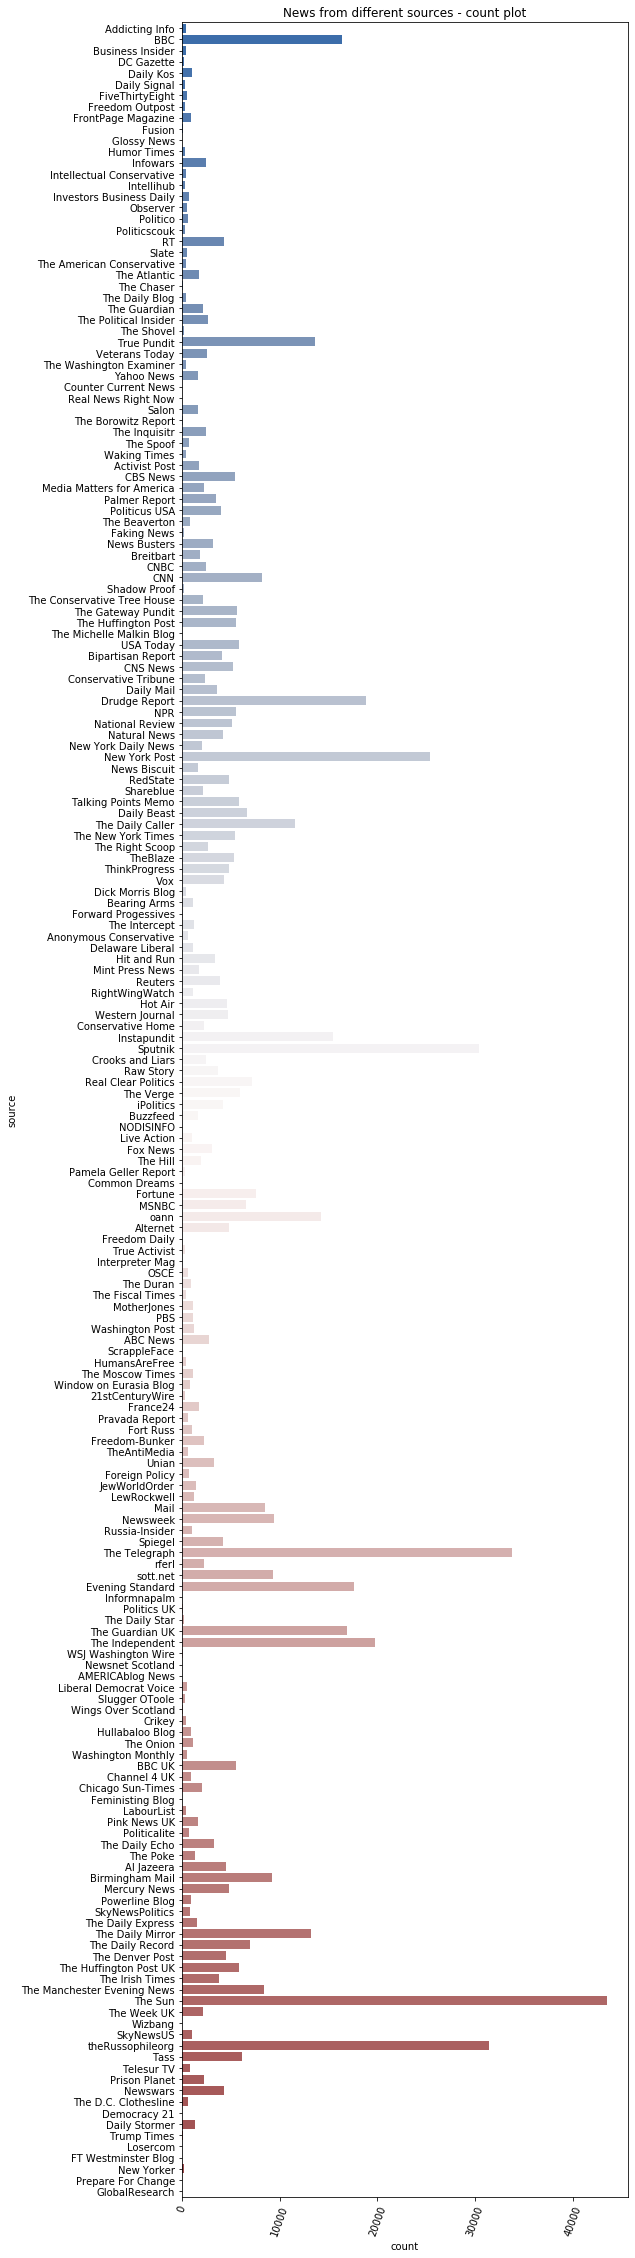

In [0]:
f, ax = plt.subplots(1,1, figsize = (8, 40))
sns.countplot(y=nela_orig_df['source'], ax = ax, palette="vlag")
ax.tick_params('x', rotation = 70)
ax.set_title('News from different sources - count plot')
plt.show()

In [0]:
nela_orig_df.head()

date          source  \
0  2018-02-01  Addicting Info   
1  2018-02-01  Addicting Info   
2  2018-02-01  Addicting Info   
3  2018-02-01             BBC   
4  2018-02-01             BBC   

                                                name  \
0  Donald Trump Jr Likes Fox News Tweet About Spr...   
1  REPORT UK Will Share Less Confidential Info Wi...   
2  Trump Jr Mocked To Oblivion After Democracy Di...   
3                Battling to save the worlds bananas   
4                             Escape from the asylum   

                                             content  
0  Since Donald Trump Jr. has admitted on Twitter...  
1  The Republican-written and Republican-altered ...  
2  The world is still laughing at the Trump admin...  
3  Visiting the Matanuska banana plantation is no...  
4  In Croatia, thousands of people with mental il...

In [0]:
nela_orig_df.describe()

date   source  \
count       712537   712537   
unique         303      194   
top     2018-08-29  The Sun   
freq          5936    43492   

                                                     name  \
count                                              712537   
unique                                             651160   
top     Latest from the OSCE Special Monitoring Missio...   
freq                                                  124   

                                          content  
count                                      712537  
unique                                     643959  
top     # 403 Forbidden\r\n\r\n* * *\r\n\r\nnginx  
freq                                         3694

### nela_orig_df.describe()
- The dataset has **4** columns - date, source, name, content 
- All the news are from **303** dates
- There are **194** unique sources for the news

### The original NELA_GT dataset has 700k+ rows and 4 columns. 
Since the number of rows are higher, the time it takes to process the dataset cleaning and running algorithms is considerably in many hours. So I am shuffeling the original nela dataset with a random_state=1000. This would make sure everytime the notebook is run, same shuffeling is retained. Out of **700k+ rows**, I'll be selecting around **5k** rows for the project.

In [0]:
nela_orig_shuf_df = sklearn.utils.shuffle(nela_orig_df, random_state=1000).reset_index(drop=True).copy()
nela_df = nela_orig_shuf_df.head(5000).copy()
nela_df.head(5)

date           source  \
0  2018-11-16  The Independent   
1  2018-08-29    Prison Planet   
2  2018-10-08    The Telegraph   
3  2018-11-05  The Guardian UK   
4  2018-04-23              BBC   

                                                name  \
0  Arecibo message What happened when people clai...   
1  CNN Contributor Mike Pence Is A Christian Supr...   
2  Four sisters among 20 dead in horror limo cras...   
3         Inside the campaign to stop Brexit podcast   
4  Toronto collision Pedestrians injured after va...   

                                             content  
0  When the Arecibo message was sent into space i...  
1  According to CNN contributor Michael DAntonio,...  
2  A limousine carrying four sisters, other relat...  
3  As Brexit negotiations gear up again this week...  
4  Up to 10 pedestrians have been struck by a van...

### nela_df().describe()
- The rows selected for inital testing are 15k rows
- Unique dates chosen are 288/303
- Unique source chosen are 172/194

In [0]:
nela_df.describe()

date   source  \
count         5000     5000   
unique         288      172   
top     2018-08-10  The Sun   
freq            56      288   

                                                     name  \
count                                                5000   
unique                                               4994   
top     Latest from the OSCE Special Monitoring Missio...   
freq                                                    5   

                                          content  
count                                        5000  
unique                                       4952  
top     # 403 Forbidden\r\n\r\n* * *\r\n\r\nnginx  
freq                                           23

### Amalgamation 1:  With the labels data set


In [0]:
nela_merge_df = nela_df.merge(labels_df, on="source", how = 'inner')
nela_labels_df = sklearn.utils.shuffle(nela_merge_df, random_state=100).reset_index(drop=True).copy()
nela_labels_df_backup = nela_labels_df.copy()

In [0]:
nela_labels_df.head(5)

date            source  \
0  2018-10-10    Pravada Report   
1  2018-07-15           Sputnik   
2  2018-08-16             MSNBC   
3  2018-07-06           Fortune   
4  2018-08-16  Evening Standard   

                                                name  \
0            US-Chinese relations go down to Ice Age   
1  Microsoft Urges US Government to Regulate Faci...   
2   What Donald Trump said about being black in 1989   
3       There Are Fears About an Oil Spike Above 150   
4  Mauricio Pochettino ready for apostoughestapos...   

                                             content  \
0  The Trump administration plans to limit China'...   
1  "Facial-recognition technology raises issues t...   
2  # What Donald Trump said about being black in ...   
3  Oil investors may regret urging companies to c...   
4  Mauricio Pochettino has warned that this seaso...   

   NewsGuard, Does not repeatedly publish false content  \
0                                                NaN      
1                                                1.0      
2                                                0.0      
3                                                0.0      
4                                                NaN      

   NewsGuard, Gathers and presents information responsibly  \
0                                                NaN         
1                                                1.0         
2                                                0.0         
3                                                0.0         
4                                                NaN         

   NewsGuard, Regularly corrects or clarifies errors  \
0                                                NaN   
1                                                1.0   
2                                                1.0   
3                                                0.0   
4                                                NaN   

   NewsGuard, Handles the difference between news and opinion responsibly  \
0                                                NaN                        
1                                                1.0                        
2                                                0.0                        
3                                                0.0                        
4                                                NaN                        

   NewsGuard, Avoids deceptive headlines  \
0                                    NaN   
1                                    1.0   
2                                    0.0   
3                                    0.0   
4                                    NaN   

   NewsGuard, Website discloses ownership and financing  \
0                                                NaN      
1                                                1.0      
2                                                0.0      
3                                                0.0      
4                                                NaN      

   NewsGuard, Clearly labels advertising  \
0                                    NaN   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    NaN   

   NewsGuard, Reveals who's in charge, including any possible conflicts of interest  \
0                                                NaN                                  
1                                                1.0                                  
2                                                1.0                                  
3                                                0.0                                  
4                                                NaN                                  

   NewsGuard, Provides information about content creators  NewsGuard, score  \
0                                                NaN                    NaN   
1                             

In [0]:
nela_labels_df.shape

(4232, 61)

In [0]:
nela_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232 entries, 0 to 4231
Data columns (total 61 columns):
date                                                                                4232 non-null object
source                                                                              4232 non-null object
name                                                                                4232 non-null object
content                                                                             4232 non-null object
NewsGuard, Does not repeatedly publish false content                                2756 non-null float64
NewsGuard, Gathers and presents information responsibly                             2756 non-null float64
NewsGuard, Regularly corrects or clarifies errors                                   2756 non-null float64
NewsGuard, Handles the difference between news and opinion responsibly              2756 non-null float64
NewsGuard, Avoids deceptive headlines            

### Amalgamation 2: Interpreting the source content based on following providers
<br> 
- NewsGuard : Among the following, NewGuard overall_class is itself an encoded_label for the sources. A New column 'newsguard_label' is amalgamated based on the 0/1 values of overall_class
  - Gathers and presents information responsibly
  - Regularly corrects or clarifies errors
  - Handles the difference between news and opinion responsibly
  - Avoids deceptive headlines
  - Website discloses ownership and financing
  - Clearly labels advertising
  - Reveals who's in charge, including any possible conflicts of interest
  - Provides information about content creators
  - score
  - overall_class
<br>

- Pew Research Center : Among the following, Pew Research Center inference columns known_by_40% has a binary value based on the poplarity of the source. A New column 'pewresearch_label' is amalagamated based on the 0/1 values of known_by_40%
  - known_by_40%
  - total
  - consistently_liberal
  - mostly_liberal', 'Pew Research Center, mixed
  - mostly conservative
  - consistently conservative', 
<br>
- Wikipedia : Label wikipedia_label is created for 0/1 value if fake its set to 0
  - is_fake
<br>
- Open Sources: Among the following, Open Sources inference columns bias has a 1, 2, 3 score based on the bias of the source. A New column 'opensourcebias_label' is amalagamated based on the bias values 1-3
  - reliable
  - fake
  - unreliable
  - bias
  - conspiracy
  - hate
  - junksci
  - rumor
  - blog
  - clickbait
  - political
  - satire
  - state
<br>
- Media Bias: Media Bias inference columns label has a specific facts on the source. A New column 'mediabias_label' is amalagamated based on the bias factors [ 'conspiracy_pseudoscience', 'left_center_bias', 'left_bias', 'right_bias', 'questionable_source', 'right_center_bias', 'least_biased', 'satire' ]

  - label
  - factual_reporting
  - extreme_left
  - right
  - extreme_right
  - propaganda
  - fake_news
  - some_fake_news
  - failed_fact_checks
  - conspiracy
  - pseudoscience
  - hate_group
  - anti_islam
  - nationalism
<br>
- Allsides: Among the following, Allsides inference columns community_label has a factors based on the public agreement for the source. A New column 'allsides_label' is amalagamated based on the values [ 'somewhat agree', 'somewhat disagree', 'strongly agree', 'agree', 'strongly disagree', 'absolutely agree', 'disagree' ]

  - bias_rating
  - community_agree 
  - community_disagree
  - community_label
<br>
- BuzzFeed: Only one column based on left/right leaning for the source and a new label buzzfeed_label is encoded with binary values
  - leaning
<br>
- PolitiFact: A new label politificat_label is encoded based on the true/ false counts of these columns for a source.
  - Pants on Fire!
  - False
  - Mostly False
  - Half-True
  - Mostly True
  - True
<br>
- For the rows having *NaN* values, it is retained as it is and not given any inference yet.


### Encoding NewsGuard Label content

In [0]:
def encode_newsguard(input_label):
    if input_label == 1:
        return 1
    elif input_label == 0:
        return 0
    else:
        return input_label
nela_labels_df['newsguard_label'] = nela_labels_df.apply(lambda row: encode_newsguard(row['NewsGuard, overall_class']), axis=1)


### Encoding Pew Research Center content

In [0]:
def encode_pewresearch(input_label):
    if input_label == 1:
        return 1
    elif input_label == 0:
        return 0
    else:
        return input_label
nela_labels_df['pewresearch_label'] = nela_labels_df.apply(lambda row: encode_pewresearch(row['Pew Research Center, known_by_40%']), axis=1)


### Encoding Wikipedia label

In [0]:
def encode_wikipedia(input_label):
    if input_label == 0:
        return 1
    elif input_label == 1:
        return 0
    else:
        return input_label
nela_labels_df['wikipedia_label'] = nela_labels_df.apply(lambda row: encode_wikipedia(row['Wikipedia, is_fake']), axis=1)


### Encoding OpenSource Bias label

In [0]:
def encode_opensourcebias(input_label):
    # bias left
    if input_label == 1:
        return 0
    # bias right
    elif input_label > 1:
        return 1
    else:
        return input_label
nela_labels_df['opensourcebias_label'] = nela_labels_df.apply(lambda row: encode_opensourcebias(row['Open Sources, bias']), axis=1)


### Encoding Media Bias / Fact Check, label

In [0]:
labels_df['Media Bias / Fact Check, label'].unique()

array(['conspiracy_pseudoscience', 'left_center_bias', nan, 'left_bias',
       'right_bias', 'questionable_source', 'right_center_bias',
       'least_biased', 'satire'], dtype=object)

In [0]:
true_labels = ['right_bias','right_center_bias','least_biased']
false_labels = ['conspiracy_pseudoscience','left_bias','left_center_bias', 'questionable_source', 'satire']

def encode_mediabias(input_label):
    if input_label in true_labels:
        return 1
    elif input_label in false_labels:
        return 0
    else:
        return input_label
nela_labels_df['mediabias_label'] = nela_labels_df.apply(lambda row: encode_mediabias(row['Media Bias / Fact Check, label']), axis=1)


### Encoding Allsides, community_label

In [0]:
labels_df['Allsides, community_label'].unique()

array([nan, 'somewhat agree', 'somewhat disagree', 'strongly agree',
       'agree', 'strongly disagree', 'absolutely agree', 'disagree'],
      dtype=object)

In [0]:
true_labels = ['somewhat agree','strongly agree','agree', 'absolutely agree']
false_labels = ['somewhat disagree','strongly disagree','disagree']

def encode_allsideslabel(input_label):
    if input_label in true_labels:
        return 1
    elif input_label in false_labels:
        return 0
    else:
        return input_label
nela_labels_df['allsides_label'] = nela_labels_df.apply(lambda row: encode_allsideslabel(row['Allsides, community_label']), axis=1)


### Encoding BuzzFeed, leaning

In [0]:
labels_df['BuzzFeed, leaning'].unique()

array(['left', nan, 'right'], dtype=object)

In [0]:
true_labels = ['right']
false_labels = ['left']

def encode_buzzfeedlabel(input_label):
    if input_label in true_labels:
        return 1
    elif input_label in false_labels:
        return 0
    else:
        return input_label
nela_labels_df['buzzfeed_label'] = nela_labels_df.apply(lambda row: encode_buzzfeedlabel(row['BuzzFeed, leaning']), axis=1)


### Encoding Politifact Label
PolitiFact, Pants on Fire!        
PolitiFact, False            
PolitiFact, Mostly False                     
PolitiFact, Half-True                                                        
PolitiFact, Mostly True                                                     
PolitiFact, True                                                            

In [0]:
nela_labels_df['politifact_true_count'] = nela_labels_df['PolitiFact, Half-True'] + nela_labels_df['PolitiFact, Mostly True'] + nela_labels_df['PolitiFact, True']
nela_labels_df['politifact_false_count'] = nela_labels_df['PolitiFact, Pants on Fire!'] + nela_labels_df['PolitiFact, False'] + nela_labels_df['PolitiFact, Mostly False']
nela_labels_df.head()

date            source  \
0  2018-10-10    Pravada Report   
1  2018-07-15           Sputnik   
2  2018-08-16             MSNBC   
3  2018-07-06           Fortune   
4  2018-08-16  Evening Standard   

                                                name  \
0            US-Chinese relations go down to Ice Age   
1  Microsoft Urges US Government to Regulate Faci...   
2   What Donald Trump said about being black in 1989   
3       There Are Fears About an Oil Spike Above 150   
4  Mauricio Pochettino ready for apostoughestapos...   

                                             content  \
0  The Trump administration plans to limit China'...   
1  "Facial-recognition technology raises issues t...   
2  # What Donald Trump said about being black in ...   
3  Oil investors may regret urging companies to c...   
4  Mauricio Pochettino has warned that this seaso...   

   NewsGuard, Does not repeatedly publish false content  \
0                                                NaN      
1                                                1.0      
2                                                0.0      
3                                                0.0      
4                                                NaN      

   NewsGuard, Gathers and presents information responsibly  \
0                                                NaN         
1                                                1.0         
2                                                0.0         
3                                                0.0         
4                                                NaN         

   NewsGuard, Regularly corrects or clarifies errors  \
0                                                NaN   
1                                                1.0   
2                                                1.0   
3                                                0.0   
4                                                NaN   

   NewsGuard, Handles the difference between news and opinion responsibly  \
0                                                NaN                        
1                                                1.0                        
2                                                0.0                        
3                                                0.0                        
4                                                NaN                        

   NewsGuard, Avoids deceptive headlines  \
0                                    NaN   
1                                    1.0   
2                                    0.0   
3                                    0.0   
4                                    NaN   

   NewsGuard, Website discloses ownership and financing  \
0                                                NaN      
1                                                1.0      
2                                                0.0      
3                                                0.0      
4                                                NaN      

   NewsGuard, Clearly labels advertising  \
0                                    NaN   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    NaN   

   NewsGuard, Reveals who's in charge, including any possible conflicts of interest  \
0                                                NaN                                  
1                                                1.0                                  
2                                                1.0                                  
3                                                0.0                                  
4                                                NaN                                  

   NewsGuard, Provides information about content creators  NewsGuard, score  \
0                                                NaN                    NaN   
1                             

In [0]:
def encode_politifactlabel(true_label, false_label):
    if np.isnan(true_label) or np.isnan(false_label):
        return true_label
    elif true_label > false_label:
        return 1
    else:
        return 0
nela_labels_df['politifact_label'] = nela_labels_df.apply(lambda row: encode_politifactlabel(row['politifact_true_count'], row['politifact_false_count']), axis=1)


In [0]:
nela_labels_df.head()

date            source  \
0  2018-10-10    Pravada Report   
1  2018-07-15           Sputnik   
2  2018-08-16             MSNBC   
3  2018-07-06           Fortune   
4  2018-08-16  Evening Standard   

                                                name  \
0            US-Chinese relations go down to Ice Age   
1  Microsoft Urges US Government to Regulate Faci...   
2   What Donald Trump said about being black in 1989   
3       There Are Fears About an Oil Spike Above 150   
4  Mauricio Pochettino ready for apostoughestapos...   

                                             content  \
0  The Trump administration plans to limit China'...   
1  "Facial-recognition technology raises issues t...   
2  # What Donald Trump said about being black in ...   
3  Oil investors may regret urging companies to c...   
4  Mauricio Pochettino has warned that this seaso...   

   NewsGuard, Does not repeatedly publish false content  \
0                                                NaN      
1                                                1.0      
2                                                0.0      
3                                                0.0      
4                                                NaN      

   NewsGuard, Gathers and presents information responsibly  \
0                                                NaN         
1                                                1.0         
2                                                0.0         
3                                                0.0         
4                                                NaN         

   NewsGuard, Regularly corrects or clarifies errors  \
0                                                NaN   
1                                                1.0   
2                                                1.0   
3                                                0.0   
4                                                NaN   

   NewsGuard, Handles the difference between news and opinion responsibly  \
0                                                NaN                        
1                                                1.0                        
2                                                0.0                        
3                                                0.0                        
4                                                NaN                        

   NewsGuard, Avoids deceptive headlines  \
0                                    NaN   
1                                    1.0   
2                                    0.0   
3                                    0.0   
4                                    NaN   

   NewsGuard, Website discloses ownership and financing  \
0                                                NaN      
1                                                1.0      
2                                                0.0      
3                                                0.0      
4                                                NaN      

   NewsGuard, Clearly labels advertising  \
0                                    NaN   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    NaN   

   NewsGuard, Reveals who's in charge, including any possible conflicts of interest  \
0                                                NaN                                  
1                                                1.0                                  
2                                                1.0                                  
3                                                0.0                                  
4                                                NaN                                  

   NewsGuard, Provides information about content creators  NewsGuard, score  \
0                                                NaN                    NaN   
1                             

In [0]:
nela_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232 entries, 0 to 4231
Data columns (total 71 columns):
date                                                                                4232 non-null object
source                                                                              4232 non-null object
name                                                                                4232 non-null object
content                                                                             4232 non-null object
NewsGuard, Does not repeatedly publish false content                                2756 non-null float64
NewsGuard, Gathers and presents information responsibly                             2756 non-null float64
NewsGuard, Regularly corrects or clarifies errors                                   2756 non-null float64
NewsGuard, Handles the difference between news and opinion responsibly              2756 non-null float64
NewsGuard, Avoids deceptive headlines            

### Encoding final label value based on the count of encoded labels
- encoded_label value is set to 1 / 0 based on the binary values of ['newsguard_label', 'pewresearch_label', 'wikipedia_label', 'opensourcebias_label', 'mediabias_label', 'allsides_label', 'buzzfeed_label', 'politifact_label']
- Intially encoded label and rating is set to value -100
- final encoded label is found based on the number of positives or negatives for all the above labels
- encoded label rating it also calculated 
- Eg: If for a row, newsguard_label value=1, mediabias_label=1, allsides_label=0, buzzfeed_label=1, and rest all other columns are NaN
  pos = 3,
  neg = 1
  - (pos - neg) is > 0 so encoded_label = 1
  - encoded_label_rating = pos - neg = 2

- Eg: If for a row, newsguard_label value=0, mediabias_label=0, allsides_label=0, buzzfeed_label=1, and rest all other columns are NaN
  pos = 1,
  neg = 3
  - (pos - neg) is < 0 so encoded_label = 0
  - encoded_label_rating = pos - neg = -2

- For rest other combanations for row, encoded_label is set to -100 and later these rows are dropped.

In [0]:
encoded_columns = ['newsguard_label', 'pewresearch_label', 'wikipedia_label', 'opensourcebias_label',
                    'mediabias_label', 'allsides_label', 'buzzfeed_label', 'politifact_label']

nela_labels_df['encoded_label'] = -100
nela_labels_df['encoded_label_rating'] = -100

for i in range(nela_labels_df.shape[0]):
    pos = 0
    neg = 0
    for col in encoded_columns:
        if nela_labels_df[col][i] == 1:
            pos = pos + 1
        elif nela_labels_df[col][i] == 0:
            neg = neg + 1
    if pos > neg:
        nela_labels_df.at[i, 'encoded_label'] = 1
        nela_labels_df.at[i, 'encoded_label_rating'] = pos - neg
    elif pos < neg:
        nela_labels_df.at[i, 'encoded_label'] = 0
        nela_labels_df.at[i, 'encoded_label_rating'] = pos - neg

nela_labels_df = nela_labels_df[(nela_labels_df[['encoded_label','encoded_label_rating']] != -100).all(axis=1)]
nela_labels_df.reset_index(drop=True, inplace=True)

print(nela_labels_df['encoded_label'].value_counts())
print(nela_labels_df['encoded_label_rating'].value_counts())
print(nela_labels_df.shape)

1    2231
0    1378
Name: encoded_label, dtype: int64
 1    1075
-1    1006
 2     843
-3     199
-2     153
 3     143
 4     130
 5      40
-4      20
Name: encoded_label_rating, dtype: int64
(3609, 73)


In [0]:
nela_labels_df.head(5)

date            source  \
0  2018-10-10    Pravada Report   
1  2018-07-15           Sputnik   
2  2018-07-06           Fortune   
3  2018-08-16  Evening Standard   
4  2018-09-22               NPR   

                                                name  \
0            US-Chinese relations go down to Ice Age   
1  Microsoft Urges US Government to Regulate Faci...   
2       There Are Fears About an Oil Spike Above 150   
3  Mauricio Pochettino ready for apostoughestapos...   
4  New Findings On Loan Forgiveness Puerto Rico S...   

                                             content  \
0  The Trump administration plans to limit China'...   
1  "Facial-recognition technology raises issues t...   
2  Oil investors may regret urging companies to c...   
3  Mauricio Pochettino has warned that this seaso...   
4  New Findings On Loan Forgiveness; Puerto Rico ...   

   NewsGuard, Does not repeatedly publish false content  \
0                                                NaN      
1                                                1.0      
2                                                0.0      
3                                                NaN      
4                                                0.0      

   NewsGuard, Gathers and presents information responsibly  \
0                                                NaN         
1                                                1.0         
2                                                0.0         
3                                                NaN         
4                                                0.0         

   NewsGuard, Regularly corrects or clarifies errors  \
0                                                NaN   
1                                                1.0   
2                                                0.0   
3                                                NaN   
4                                                0.0   

   NewsGuard, Handles the difference between news and opinion responsibly  \
0                                                NaN                        
1                                                1.0                        
2                                                0.0                        
3                                                NaN                        
4                                                0.0                        

   NewsGuard, Avoids deceptive headlines  \
0                                    NaN   
1                                    1.0   
2                                    0.0   
3                                    NaN   
4                                    0.0   

   NewsGuard, Website discloses ownership and financing  \
0                                                NaN      
1                                                1.0      
2                                                0.0      
3                                                NaN      
4                                                0.0      

   NewsGuard, Clearly labels advertising  \
0                                    NaN   
1                                    0.0   
2                                    0.0   
3                                    NaN   
4                                    0.0   

   NewsGuard, Reveals who's in charge, including any possible conflicts of interest  \
0                                                NaN                                  
1                                                1.0                                  
2                                                0.0                                  
3                                                NaN                                  
4                                                0.0                                  

   NewsGuard, Provides information about content creators  NewsGuard, score  \
0                                                NaN                    NaN   
1                             

### Feature News Coverage: Data Set Preparation

In [0]:
from datetime import datetime as dt

news_coverage_df1 = pd.read_csv(newsenglish_file, sep=',', error_bad_lines=False)
news_coverage_df1.rename(columns={news_coverage_df1.columns[1]: "name", news_coverage_df1.columns[2]: "content", news_coverage_df1.columns[4]: "date"}, inplace = True)
news_coverage_df1.drop(news_coverage_df1.columns.difference(['name','content', 'date']), 1, inplace=True)
date1 = pd.to_datetime(news_coverage_df1.date, errors='coerce')
news_coverage_df1['date'] = date1
news_coverage_df1 = news_coverage_df1.reindex(['date','name', 'content'], axis=1)
news_coverage_df1 = news_coverage_df1[(news_coverage_df1['date'] >= '2018-01-01') & (news_coverage_df1['date'] <= '2018-12-31')]
display(news_coverage_df1.head())

news_coverage_df2 = pd.concat(map(pd.read_csv, [newsarticle_file1, newsarticle_file2,newsarticle_file3,newsarticle_file4]))
news_coverage_df2.rename(columns={news_coverage_df2.columns[5]: "name", news_coverage_df2.columns[12]: "content", news_coverage_df2.columns[10]: "date"}, inplace = True)
date2 = pd.to_datetime(news_coverage_df2.date)
news_coverage_df2['date'] = date2.dt.normalize()
news_coverage_df2.drop(news_coverage_df2.columns.difference(['date','name', 'content']), 1, inplace=True)
news_coverage_df2 = news_coverage_df2.reindex(['date','name', 'content'], axis=1)
news_coverage_df2 = news_coverage_df2[(news_coverage_df2['date'] >= '2018-01-01') & (news_coverage_df2['date'] <= '2018-12-31')]
display(news_coverage_df2.head())

news_coverage_df3 = pd.read_json(newsecategory_file, lines=True)
#display(news_coverage_df3.head())
news_coverage_df3.rename(columns={news_coverage_df3.columns[1]: "name", news_coverage_df3.columns[4]: "content",news_coverage_df3.columns[5]: "date"}, inplace = True)
news_coverage_df3.drop(news_coverage_df3.columns.difference(['date','name', 'content']), 1, inplace=True)
news_coverage_df3 = news_coverage_df3[(news_coverage_df3['date'] >= '2018-01-01') & (news_coverage_df3['date'] <= '2018-12-31')]
news_coverage_df3 = news_coverage_df3.reindex(['date','name', 'content'], axis=1)
display(news_coverage_df3.head())

news_coverage_df = pd.concat([news_coverage_df1, news_coverage_df2, news_coverage_df3])
news_coverage_df.shape
news_coverage_df.reset_index(drop=True, inplace=True)

#news_coverage_df = news_coverage_df.head(1000)
'''
news_coverage_df4 = pd.read_csv(newsworld_file, sep=',',encoding = "utf-8")
display(news_coverage_df4.head())
fff
news_coverage_df3.rename(columns={news_coverage_df3.columns[3]: "name", news_coverage_df3.columns[5]: "content"}, inplace = True)
news_coverage_df3.drop(news_coverage_df3.columns.difference(['date','name', 'content']), 1, inplace=True)
news_coverage_df3 = news_coverage_df3[(news_coverage_df3['date'] >= '2018-01-01') & (news_coverage_df3['date'] <= '2018-12-31')]
news_coverage_df3 = news_coverage_df3.reindex(['date','name', 'content'], axis=1)
news_coverage_df3.head()
'''
print()



date                                               name  \
0 2018-02-20  Survivors of Florida school shooting launch gu...   
1 2018-02-20  VW bid to delay first U.S. diesel emissions tr...   
2 2018-02-20  Lawyer pleads guilty to lying to U.S. investig...   
3 2018-02-20  Syria pro-government forces enter Afrin to aid...   
4 2018-02-20  More bombs hit Syria's Ghouta, death toll high...   

                                             content  
0  Dozens of students and parents from the Florid...  
1  A Virginia state court judge on Tuesday reject...  
2  A lawyer and son-in-law of one of Russia’s ric...  
3  Pro-Syrian government forces entered Syria’s n...  
4  Pro-government forces pounded the rebel-held d...

date                                               name  \
0 2018-01-30  Rhythm of the Streets: ‘We’re Warrior Women, a...   
1 2018-01-30          As Deficit Grows, Congress Keeps Spending   
2 2018-01-30                       Lesson in Select Bus Service   
3 2018-01-30                 Here’s the Real State of the Union   
4 2018-01-30                       Good Riddance to Chief Wahoo   

                                             content  
0  Meet the all-female Brazilian drum group that ...  
1  Treasury Secretary Steven Mnuchin urged Congre...  
2  A woman finds out what happens when you don’t ...  
3  The reaction against his authoritarian impulse...  
4  I’ve lived in Cleveland all my life, and I’m g...

date                                               name  \
0 2018-05-26  There Were 2 Mass Shootings In Texas Last Week...   
1 2018-05-26  Will Smith Joins Diplo And Nicky Jam For The 2...   
2 2018-05-26    Hugh Grant Marries For The First Time At Age 57   
3 2018-05-26  Jim Carrey Blasts 'Castrato' Adam Schiff And D...   
4 2018-05-26  Julianna Margulies Uses Donald Trump Poop Bags...   

                                             content  
0  She left her husband. He killed their children...  
1                           Of course it has a song.  
2  The actor and his longtime girlfriend Anna Ebe...  
3  The actor gives Dems an ass-kicking for not fi...  
4  The "Dietland" actress said using the bags is ...

### NewsCoverage Dataset after merging 3 of the above NewsCoverage datasets.

In [0]:
news_coverage_df.head()


date                                               name  \
0 2018-02-20  Survivors of Florida school shooting launch gu...   
1 2018-02-20  VW bid to delay first U.S. diesel emissions tr...   
2 2018-02-20  Lawyer pleads guilty to lying to U.S. investig...   
3 2018-02-20  Syria pro-government forces enter Afrin to aid...   
4 2018-02-20  More bombs hit Syria's Ghouta, death toll high...   

                                             content  
0  Dozens of students and parents from the Florid...  
1  A Virginia state court judge on Tuesday reject...  
2  A lawyer and son-in-law of one of Russia’s ric...  
3  Pro-Syrian government forces entered Syria’s n...  
4  Pro-government forces pounded the rebel-held d...

In [0]:
news_coverage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22945 entries, 0 to 22944
Data columns (total 3 columns):
date       22945 non-null datetime64[ns]
name       22945 non-null object
content    22945 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 537.9+ KB


### Split the nela_df to train_news and test_news
- sklearn train_test_split is used to split the nela_data as train_news **(3067 rows)** and test_news **(542 rows)**

In [0]:
train_news, test_news = train_test_split(nela_labels_df, test_size=0.15,shuffle=False)

In [0]:
train_news = train_news.reset_index(drop=True)
test_news = test_news.reset_index(drop=True)

In [0]:
train_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3067 entries, 0 to 3066
Data columns (total 73 columns):
date                                                                                3067 non-null object
source                                                                              3067 non-null object
name                                                                                3067 non-null object
content                                                                             3067 non-null object
NewsGuard, Does not repeatedly publish false content                                1830 non-null float64
NewsGuard, Gathers and presents information responsibly                             1830 non-null float64
NewsGuard, Regularly corrects or clarifies errors                                   1830 non-null float64
NewsGuard, Handles the difference between news and opinion responsibly              1830 non-null float64
NewsGuard, Avoids deceptive headlines            

In [0]:
test_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 73 columns):
date                                                                                542 non-null object
source                                                                              542 non-null object
name                                                                                542 non-null object
content                                                                             542 non-null object
NewsGuard, Does not repeatedly publish false content                                353 non-null float64
NewsGuard, Gathers and presents information responsibly                             353 non-null float64
NewsGuard, Regularly corrects or clarifies errors                                   353 non-null float64
NewsGuard, Handles the difference between news and opinion responsibly              353 non-null float64
NewsGuard, Avoids deceptive headlines                      

In [0]:
train_news.head()

date            source  \
0  2018-10-10    Pravada Report   
1  2018-07-15           Sputnik   
2  2018-07-06           Fortune   
3  2018-08-16  Evening Standard   
4  2018-09-22               NPR   

                                                name  \
0            US-Chinese relations go down to Ice Age   
1  Microsoft Urges US Government to Regulate Faci...   
2       There Are Fears About an Oil Spike Above 150   
3  Mauricio Pochettino ready for apostoughestapos...   
4  New Findings On Loan Forgiveness Puerto Rico S...   

                                             content  \
0  The Trump administration plans to limit China'...   
1  "Facial-recognition technology raises issues t...   
2  Oil investors may regret urging companies to c...   
3  Mauricio Pochettino has warned that this seaso...   
4  New Findings On Loan Forgiveness; Puerto Rico ...   

   NewsGuard, Does not repeatedly publish false content  \
0                                                NaN      
1                                                1.0      
2                                                0.0      
3                                                NaN      
4                                                0.0      

   NewsGuard, Gathers and presents information responsibly  \
0                                                NaN         
1                                                1.0         
2                                                0.0         
3                                                NaN         
4                                                0.0         

   NewsGuard, Regularly corrects or clarifies errors  \
0                                                NaN   
1                                                1.0   
2                                                0.0   
3                                                NaN   
4                                                0.0   

   NewsGuard, Handles the difference between news and opinion responsibly  \
0                                                NaN                        
1                                                1.0                        
2                                                0.0                        
3                                                NaN                        
4                                                0.0                        

   NewsGuard, Avoids deceptive headlines  \
0                                    NaN   
1                                    1.0   
2                                    0.0   
3                                    NaN   
4                                    0.0   

   NewsGuard, Website discloses ownership and financing  \
0                                                NaN      
1                                                1.0      
2                                                0.0      
3                                                NaN      
4                                                0.0      

   NewsGuard, Clearly labels advertising  \
0                                    NaN   
1                                    0.0   
2                                    0.0   
3                                    NaN   
4                                    0.0   

   NewsGuard, Reveals who's in charge, including any possible conflicts of interest  \
0                                                NaN                                  
1                                                1.0                                  
2                                                0.0                                  
3                                                NaN                                  
4                                                0.0                                  

   NewsGuard, Provides information about content creators  NewsGuard, score  \
0                                                NaN                    NaN   
1                             

In [0]:
test_news.head()

date        source  \
0  2018-02-20       Sputnik   
1  2018-04-24           CNN   
2  2018-10-12       The Sun   
3  2018-10-04  Pink News UK   
4  2018-08-29          CNBC   

                                                name  \
0  Abbas Leaves UNSC After Palestinian Statehood ...   
1  Texas sets June special election to replace Fa...   
2  Thousands of homeowners overpaying mortgage by...   
3  Hillary Clinton lays into racist sexist anti-L...   
4  Court rejects failed GOP candidate Don Blanken...   

                                             content  \
0  The main subject of Abbas' Tuesday speech was ...   
1  Texas GOP Gov. Greg Abbott on Tuesday set a sp...   
2  THOUSANDS of homeowners are overpaying on thei...   
3  Signup to receive a daily roundup of the top L...   
4  Republicans are looking to expand their majori...   

   NewsGuard, Does not repeatedly publish false content  \
0                                                1.0      
1                                                0.0      
2                                                NaN      
3                                                NaN      
4                                                0.0      

   NewsGuard, Gathers and presents information responsibly  \
0                                                1.0         
1                                                0.0         
2                                                NaN         
3                                                NaN         
4                                                0.0         

   NewsGuard, Regularly corrects or clarifies errors  \
0                                                1.0   
1                                                0.0   
2                                                NaN   
3                                                NaN   
4                                                0.0   

   NewsGuard, Handles the difference between news and opinion responsibly  \
0                                                1.0                        
1                                                0.0                        
2                                                NaN                        
3                                                NaN                        
4                                                0.0                        

   NewsGuard, Avoids deceptive headlines  \
0                                    1.0   
1                                    0.0   
2                                    NaN   
3                                    NaN   
4                                    0.0   

   NewsGuard, Website discloses ownership and financing  \
0                                                1.0      
1                                                0.0      
2                                                NaN      
3                                                NaN      
4                                                0.0      

   NewsGuard, Clearly labels advertising  \
0                                    0.0   
1                                    0.0   
2                                    NaN   
3                                    NaN   
4                                    0.0   

   NewsGuard, Reveals who's in charge, including any possible conflicts of interest  \
0                                                1.0                                  
1                                                0.0                                  
2                                                NaN                                  
3                                                NaN                                  
4                                                1.0                                  

   NewsGuard, Provides information about content creators  NewsGuard, score  \
0                                                1.0                    7.5   
1                                                0.0  

## Data Distillation

### Data cleaning, removing stopwords, lemmatizing, tokenizing

In [0]:
global stops
global stemmer
global wlemmatizer
global tokenizer

stops = set(nltk.corpus.stopwords.words("english"))
stemmer = nltk.stem.SnowballStemmer('english')
wlemmatizer = WordNetLemmatizer()
tokenizer = nltk.word_tokenize

def cleaning(raw_news):
    
    import nltk
    global stops
    global stemmer
    global wlemmatizer
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Remove punctuation
    news = news.translate(str.maketrans('', '', string.punctuation))
        
    # 4. Tokenize.
    news_words = tokenizer(news)
        
    # 5. Remove stop words. 
    words = [w for w in news_words if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [wlemmatizer.lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [stemmer.stem(w) for w in wordnet_lem ]

    # 8. Join the stemmed words back into one string after removing small words
    return ' '.join(word for word in stems if len(word) > 2)


### Amalgamation 3: With clean data merge

In [0]:
import time
t1 = time.time()
train_news['clean'] = train_news["content"].apply(cleaning) 
t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(train_news), "news:", (t2-t1)/60, "min")

display(train_news.head())

t1 = time.time()
test_news['clean'] = test_news["content"].apply(cleaning)
t2 = time.time()
print("\n\nTime to clean, tokenize and stem test data: \n", len(test_news), "news:", (t2-t1)/60, "min")

display(test_news.head())

t1 = time.time()
news_coverage_df['clean'] = news_coverage_df["content"].apply(cleaning)
t2 = time.time()
print("\n\nTime to clean, tokenize and stem news_coverage data: \n", len(news_coverage_df), "news:", (t2-t1)/60, "min")

display(test_news.head())




Time to clean, tokenize and stem train data: 
 3067 news: 0.37030370235443116 min


date            source  \
0  2018-10-10    Pravada Report   
1  2018-07-15           Sputnik   
2  2018-07-06           Fortune   
3  2018-08-16  Evening Standard   
4  2018-09-22               NPR   

                                                name  \
0            US-Chinese relations go down to Ice Age   
1  Microsoft Urges US Government to Regulate Faci...   
2       There Are Fears About an Oil Spike Above 150   
3  Mauricio Pochettino ready for apostoughestapos...   
4  New Findings On Loan Forgiveness Puerto Rico S...   

                                             content  \
0  The Trump administration plans to limit China'...   
1  "Facial-recognition technology raises issues t...   
2  Oil investors may regret urging companies to c...   
3  Mauricio Pochettino has warned that this seaso...   
4  New Findings On Loan Forgiveness; Puerto Rico ...   

   NewsGuard, Does not repeatedly publish false content  \
0                                                NaN      
1                                                1.0      
2                                                0.0      
3                                                NaN      
4                                                0.0      

   NewsGuard, Gathers and presents information responsibly  \
0                                                NaN         
1                                                1.0         
2                                                0.0         
3                                                NaN         
4                                                0.0         

   NewsGuard, Regularly corrects or clarifies errors  \
0                                                NaN   
1                                                1.0   
2                                                0.0   
3                                                NaN   
4                                                0.0   

   NewsGuard, Handles the difference between news and opinion responsibly  \
0                                                NaN                        
1                                                1.0                        
2                                                0.0                        
3                                                NaN                        
4                                                0.0                        

   NewsGuard, Avoids deceptive headlines  \
0                                    NaN   
1                                    1.0   
2                                    0.0   
3                                    NaN   
4                                    0.0   

   NewsGuard, Website discloses ownership and financing  \
0                                                NaN      
1                                                1.0      
2                                                0.0      
3                                                NaN      
4                                                0.0      

   NewsGuard, Clearly labels advertising  \
0                                    NaN   
1                                    0.0   
2                                    0.0   
3                                    NaN   
4                                    0.0   

   NewsGuard, Reveals who's in charge, including any possible conflicts of interest  \
0                                                NaN                                  
1                                                1.0                                  
2                                                0.0                                  
3                                                NaN                                  
4                                                0.0                                  

   NewsGuard, Provides information about content creators  NewsGuard, score  \
0                                                NaN                    NaN   
1                             



Time to clean, tokenize and stem test data: 
 542 news: 0.06039092938105265 min


date        source  \
0  2018-02-20       Sputnik   
1  2018-04-24           CNN   
2  2018-10-12       The Sun   
3  2018-10-04  Pink News UK   
4  2018-08-29          CNBC   

                                                name  \
0  Abbas Leaves UNSC After Palestinian Statehood ...   
1  Texas sets June special election to replace Fa...   
2  Thousands of homeowners overpaying mortgage by...   
3  Hillary Clinton lays into racist sexist anti-L...   
4  Court rejects failed GOP candidate Don Blanken...   

                                             content  \
0  The main subject of Abbas' Tuesday speech was ...   
1  Texas GOP Gov. Greg Abbott on Tuesday set a sp...   
2  THOUSANDS of homeowners are overpaying on thei...   
3  Signup to receive a daily roundup of the top L...   
4  Republicans are looking to expand their majori...   

   NewsGuard, Does not repeatedly publish false content  \
0                                                1.0      
1                                                0.0      
2                                                NaN      
3                                                NaN      
4                                                0.0      

   NewsGuard, Gathers and presents information responsibly  \
0                                                1.0         
1                                                0.0         
2                                                NaN         
3                                                NaN         
4                                                0.0         

   NewsGuard, Regularly corrects or clarifies errors  \
0                                                1.0   
1                                                0.0   
2                                                NaN   
3                                                NaN   
4                                                0.0   

   NewsGuard, Handles the difference between news and opinion responsibly  \
0                                                1.0                        
1                                                0.0                        
2                                                NaN                        
3                                                NaN                        
4                                                0.0                        

   NewsGuard, Avoids deceptive headlines  \
0                                    1.0   
1                                    0.0   
2                                    NaN   
3                                    NaN   
4                                    0.0   

   NewsGuard, Website discloses ownership and financing  \
0                                                1.0      
1                                                0.0      
2                                                NaN      
3                                                NaN      
4                                                0.0      

   NewsGuard, Clearly labels advertising  \
0                                    0.0   
1                                    0.0   
2                                    NaN   
3                                    NaN   
4                                    0.0   

   NewsGuard, Reveals who's in charge, including any possible conflicts of interest  \
0                                                1.0                                  
1                                                0.0                                  
2                                                NaN                                  
3                                                NaN                                  
4                                                1.0                                  

   NewsGuard, Provides information about content creators  NewsGuard, score  \
0                                                1.0                    7.5   
1                                                0.0  



Time to clean, tokenize and stem news_coverage data: 
 22945 news: 1.1963816165924073 min


date        source  \
0  2018-02-20       Sputnik   
1  2018-04-24           CNN   
2  2018-10-12       The Sun   
3  2018-10-04  Pink News UK   
4  2018-08-29          CNBC   

                                                name  \
0  Abbas Leaves UNSC After Palestinian Statehood ...   
1  Texas sets June special election to replace Fa...   
2  Thousands of homeowners overpaying mortgage by...   
3  Hillary Clinton lays into racist sexist anti-L...   
4  Court rejects failed GOP candidate Don Blanken...   

                                             content  \
0  The main subject of Abbas' Tuesday speech was ...   
1  Texas GOP Gov. Greg Abbott on Tuesday set a sp...   
2  THOUSANDS of homeowners are overpaying on thei...   
3  Signup to receive a daily roundup of the top L...   
4  Republicans are looking to expand their majori...   

   NewsGuard, Does not repeatedly publish false content  \
0                                                1.0      
1                                                0.0      
2                                                NaN      
3                                                NaN      
4                                                0.0      

   NewsGuard, Gathers and presents information responsibly  \
0                                                1.0         
1                                                0.0         
2                                                NaN         
3                                                NaN         
4                                                0.0         

   NewsGuard, Regularly corrects or clarifies errors  \
0                                                1.0   
1                                                0.0   
2                                                NaN   
3                                                NaN   
4                                                0.0   

   NewsGuard, Handles the difference between news and opinion responsibly  \
0                                                1.0                        
1                                                0.0                        
2                                                NaN                        
3                                                NaN                        
4                                                0.0                        

   NewsGuard, Avoids deceptive headlines  \
0                                    1.0   
1                                    0.0   
2                                    NaN   
3                                    NaN   
4                                    0.0   

   NewsGuard, Website discloses ownership and financing  \
0                                                1.0      
1                                                0.0      
2                                                NaN      
3                                                NaN      
4                                                0.0      

   NewsGuard, Clearly labels advertising  \
0                                    0.0   
1                                    0.0   
2                                    NaN   
3                                    NaN   
4                                    0.0   

   NewsGuard, Reveals who's in charge, including any possible conflicts of interest  \
0                                                1.0                                  
1                                                0.0                                  
2                                                NaN                                  
3                                                NaN                                  
4                                                1.0                                  

   NewsGuard, Provides information about content creators  NewsGuard, score  \
0                                                1.0                    7.5   
1                                                0.0  

In [0]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

def topics(tokenized_words):
    global lda_model
    d = Dictionary([tokenized_words])
    c = [d.doc2bow(tokenized_words)]
    lda_model = LdaModel(c, num_topics=1, id2word=d)
    return list(lda_model.print_topics(num_topics=1, num_words=5))

In [0]:
print(train_news['name'][0])
print(train_news['content'][0])

US-Chinese relations go down to Ice Age
The Trump administration plans to limit China's influence in the world.

The recent actions of the American authorities in relation to China can hardly be called friendly. The exchange of mutual sanctions resembles a game, but experts are rather pessimistic in their forecasts.

China remains calm, but one must admit that tensions are growing, and contradictions and mutual claims between Washington and Beijing are intensifying. Is the world witnessing another Cold War? Most Americans, being preoccupied with their domestic problems, do not pay much attention to the changes that have recently taken place in the policy of the Trump administration in relation to China.

US Vice President Mike Pence, speaking last week at the Hudson Institute, outlined basic changes in USA's relations with China. He criticised a few decisions that the Chinese authorities have recently made. Pence condemned China's oppression of Tibetans and Uighurs, the "Made in China 

### Saving the cleaned files to the local drive

In [0]:
train_news['cleanlist'] = train_news['clean'].str.split(' ')
test_news['cleanlist'] = test_news['clean'].str.split(' ')
news_coverage_df['cleanlist'] = news_coverage_df['clean'].str.split(' ')


train_news.to_csv(train_filename_processed, sep=',')
test_news.to_csv(test_filename_processed, sep=',')
news_coverage_df.to_csv(newscoverage_filename_processed, sep=',')


### Visualizing the processed train, test setson Word Cloud


In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


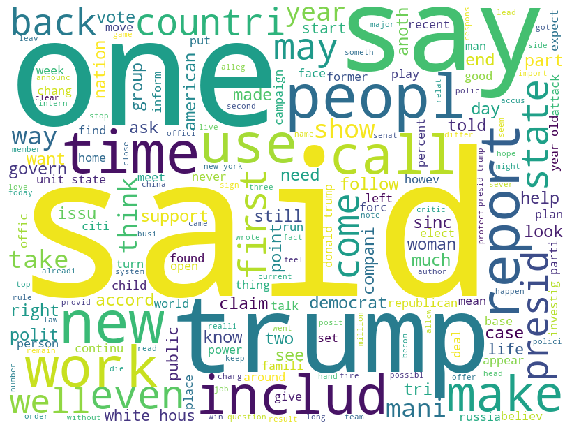

In [0]:
cloud(' '.join(train_news['clean']))

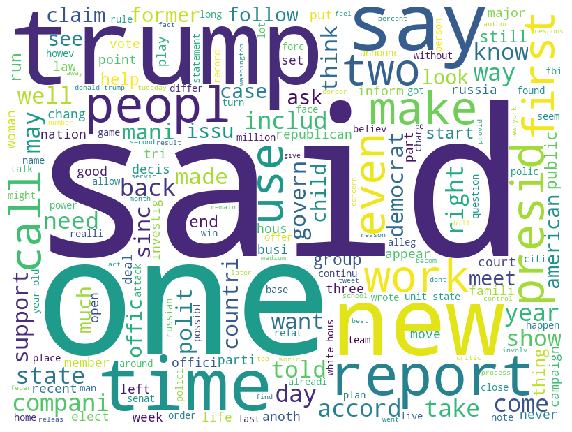

In [0]:
cloud(' '.join(test_news['clean']))

### Appling LDA model to train, test dataframes

In [0]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

def topics(tokenized_words):
    global lda_model
    d = Dictionary([tokenized_words])
    c = [d.doc2bow(tokenized_words)]
    lda_model = LdaModel(c, num_topics=1, id2word=d)
    return list(lda_model.print_topics(num_topics=1, num_words=5))

In [0]:
train_news['topics'] = train_news['cleanlist'].apply(topics)
test_news['topics'] = test_news['cleanlist'].apply(topics)
news_coverage_df['topics'] = news_coverage_df['cleanlist'].apply(topics)

### LDA topics with most relavent words with weights

In [0]:
train_news.clean[10]

'new york republican state committe purchas one way bus ticket canada governor andrew cuomo respons comment america never great group say new york gop post copi ticket issu andrew cuomo adirondack trailway bus ride albani montreal quebec along press releas slam governor statement disparag unit state valu ticket valid friday august chip one way ticket canada andrew cuomo group wrote twitter donat love leav that choic cuomo said new york gop spokeswoman jessica proud dont think america ever great dont appreci extraordinari gift famili got there bus ticket canada wait truli believ america stay apolog new york school child parent american advanc hate america narrat push radic left democrat parti cuomo made remark earlier week manhattan event obvious dig presid trump wild popular ralli slogan make america great make america great never great cuomo said reach great everi american fulli engag reach great discrimin stereotyp woman gone everi woman reach full potenti realiz unleash cuomo commen

In [0]:
train_news.topics[10]

[(0,
  '0.031*"cuomo" + 0.031*"great" + 0.025*"america" + 0.025*"new" + 0.022*"york"')]

In [0]:
news_coverage_df.topics[10]

[(0,
  '0.049*"said" + 0.049*"kill" + 0.037*"sinc" + 0.037*"hour" + 0.037*"observatori"')]

### Add a function to remove LDA weights from topics

In [0]:
#@title
def parseTopics(topics):
    output = []
    words = topics[0][1].split( '+' )
    for word in words:
        output.append( word.split('*')[1].replace( '"', '' ) )
    return output

### Applying the parseTopics to create a column having list of top 10 words from the LDA output.

In [0]:
train_news['topicsparsedlist'] = train_news['topics'].apply(parseTopics)
test_news['topicsparsedlist'] = test_news['topics'].apply(parseTopics)
news_coverage_df['topicsparsedlist'] = news_coverage_df['topics'].apply(parseTopics)

train_news['topicsparsed'] = train_news['topicsparsedlist'].apply(' '.join)
test_news['topicsparsed'] = test_news['topicsparsedlist'].apply(' '.join)
news_coverage_df['topicsparsed'] = news_coverage_df['topicsparsedlist'].apply(' '.join)


In [0]:
test_news.head()

date        source  \
0  2018-02-20       Sputnik   
1  2018-04-24           CNN   
2  2018-10-12       The Sun   
3  2018-10-04  Pink News UK   
4  2018-08-29          CNBC   

                                                name  \
0  Abbas Leaves UNSC After Palestinian Statehood ...   
1  Texas sets June special election to replace Fa...   
2  Thousands of homeowners overpaying mortgage by...   
3  Hillary Clinton lays into racist sexist anti-L...   
4  Court rejects failed GOP candidate Don Blanken...   

                                             content  \
0  The main subject of Abbas' Tuesday speech was ...   
1  Texas GOP Gov. Greg Abbott on Tuesday set a sp...   
2  THOUSANDS of homeowners are overpaying on thei...   
3  Signup to receive a daily roundup of the top L...   
4  Republicans are looking to expand their majori...   

   NewsGuard, Does not repeatedly publish false content  \
0                                                1.0      
1                                                0.0      
2                                                NaN      
3                                                NaN      
4                                                0.0      

   NewsGuard, Gathers and presents information responsibly  \
0                                                1.0         
1                                                0.0         
2                                                NaN         
3                                                NaN         
4                                                0.0         

   NewsGuard, Regularly corrects or clarifies errors  \
0                                                1.0   
1                                                0.0   
2                                                NaN   
3                                                NaN   
4                                                0.0   

   NewsGuard, Handles the difference between news and opinion responsibly  \
0                                                1.0                        
1                                                0.0                        
2                                                NaN                        
3                                                NaN                        
4                                                0.0                        

   NewsGuard, Avoids deceptive headlines  \
0                                    1.0   
1                                    0.0   
2                                    NaN   
3                                    NaN   
4                                    0.0   

   NewsGuard, Website discloses ownership and financing  \
0                                                1.0      
1                                                0.0      
2                                                NaN      
3                                                NaN      
4                                                0.0      

   NewsGuard, Clearly labels advertising  \
0                                    0.0   
1                                    0.0   
2                                    NaN   
3                                    NaN   
4                                    0.0   

   NewsGuard, Reveals who's in charge, including any possible conflicts of interest  \
0                                                1.0                                  
1                                                0.0                                  
2                                                NaN                                  
3                                                NaN                                  
4                                                1.0                                  

   NewsGuard, Provides information about content creators  NewsGuard, score  \
0                                                1.0                    7.5   
1                                                0.0  

In [0]:
train_news.to_csv(train_filename_lda_processed, sep=',')
test_news.to_csv(test_filename_lda_processed, sep=',')
news_coverage_df.to_csv(newscoverage_filename_lda_processed, sep=',')

### Word2Vector, TSNE visualization plot function

In [0]:
from gensim.models import word2vec
num_features = 400
min_count = 40
num_processor = 4
context = 10
downsampling = 0.001

In [0]:
train_words = []
test_words = [] 

# Append all the cleaned words
for news in train_news['clean']:
    train_words.append(news.split())
# print(train_words)   

# Append all the cleaned words
for news in test_news['clean']:
    test_words.append(news.split())
# print(test_words)

In [0]:
train_w2v = word2vec.Word2Vec(train_words, workers = num_processor, 
                         size = num_features, min_count = min_count,
                         window = context, sample = downsampling)
train_w2v.init_sims(replace = True)

test_w2v = word2vec.Word2Vec(train_words, workers = num_processor, 
                         size = num_features, min_count = min_count,
                         window = context, sample = downsampling)
test_w2v.init_sims(replace = True)


In [0]:
from sklearn.manifold import TSNE
def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=20, n_components=2, init='pca', n_iter=250, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

### Doc2Vec Approach to compare the topics in the nela dataset with the news_coverage dataset. Creating a tagged document for the news dataset.

In [0]:
#word modeling
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression

tagged_news = [TaggedDocument(words=word_tokenize(_d.lower()), \
                              tags=[str(i)]) for i, _d in enumerate(news_coverage_df['topicsparsed'])]


### Defining Doc2Vec Model

In [0]:
doc2vecmodel = Doc2Vec(vector_size=100, # 100 should be fine based on the standards
                window=8, #change to 8
                alpha=.025, #initial learning rate
                min_alpha=0.00025, #learning rate drops linearly to this
                min_count=2, #ignores all words with total frequency lower than this.
                dm =0, #algorith 0=distributed bow, 1=distributed memory
                workers=16,#cores to use
                epochs=2)

#build the vocab on the training data
doc2vecmodel.build_vocab(tagged_news)

### Training Doc2Vec model for news_coverage df

In [0]:
doc2vecmodel.train(tagged_news, total_examples=doc2vecmodel.corpus_count, epochs=doc2vecmodel.epochs)
doc2vecmodel.save(oldnews_doc2vector_filename_model)
print("Model Saved")


Model Saved


### Doc2Vec infer vector on nela test_news  row or topic.

In [0]:
#doc_id = random.randint(0, len(test_corpus) - 1)
doc_id = 0
inferred_vector = doc2vecmodel.infer_vector(test_news['topicsparsedlist'][doc_id])
sims = doc2vecmodel.docvecs.most_similar([inferred_vector], topn=len(doc2vecmodel.docvecs))
#Most similar doc_id and its ranking
print(sims[0][0], sims[0][1])
print(sims[1][0], sims[1][1])

10390 0.4186753034591675
1652 0.38210350275039673


### Selecting the words with range from the following Doc2Vec inferred similarity list of 22k elements for each test document.
1. Top documentID and value
2. Second in the list
3. Next in the list
4. top 1% in the list
5. top 25% in the list
6. top 50% in the list
7. top 75% in the list
8. Last in the list 

In [0]:
newslen = news_coverage_df['topicsparsedlist'].count()
top1 = newslen//100
top25 = newslen//4
top50 = newslen//2
top75 = 3 * newslen//4

print(newslen)
def getDoc2VectorValues(doc_list):
    values = []
    inferred_vector = doc2vecmodel.infer_vector(doc_list)
    sims = doc2vecmodel.docvecs.most_similar([inferred_vector], topn=len(doc2vecmodel.docvecs))
    return [sims[0], sims[1], sims[2], sims[top1], sims[top25], sims[top50], sims[top75], sims[newslen-1]]


22945


### Printing the matching values for the test news nela data set for first 10 topics. The output shown below is the the list sorted in the ranking order inferred from the doc2vec trained model.

In [0]:
for i in range(10):
    print(getDoc2VectorValues(test_news['topicsparsedlist'][i]))

[('10390', 0.41953229904174805), ('1652', 0.3820646107196808), ('451', 0.3441789150238037), ('9458', 0.2314687967300415), ('8907', 0.06805644184350967), ('21434', 0.00015349499881267548), ('8446', -0.06804834306240082), ('7029', -0.38934576511383057)]
[('19610', 0.4279336631298065), ('12188', 0.42786040902137756), ('15343', 0.4211236238479614), ('18592', 0.22664107382297516), ('4561', 0.06871980428695679), ('6801', -0.0007292553782463074), ('13619', -0.06746505200862885), ('21117', -0.40628206729888916)]
[('9285', 0.36538875102996826), ('4511', 0.36463332176208496), ('18313', 0.35108762979507446), ('5949', 0.22845035791397095), ('19926', 0.06889260560274124), ('1041', 0.00015317043289542198), ('2443', -0.06548875570297241), ('6384', -0.4028298258781433)]
[('1651', 0.40990227460861206), ('781', 0.36124151945114136), ('1575', 0.34732887148857117), ('13609', 0.23085850477218628), ('10803', 0.06773112714290619), ('5355', 0.0012459419667720795), ('18089', -0.06724981963634491), ('1670', -0.

In [0]:
test_news['doc2vector_values'] = ''
train_news['doc2vector_values'] = ''
test_news['doc2vector_values'] = test_news['doc2vector_values'].astype(object)
train_news['doc2vector_values'] = train_news['doc2vector_values'].astype(object)

test_news.head()

date        source  \
0  2018-02-20       Sputnik   
1  2018-04-24           CNN   
2  2018-10-12       The Sun   
3  2018-10-04  Pink News UK   
4  2018-08-29          CNBC   

                                                name  \
0  Abbas Leaves UNSC After Palestinian Statehood ...   
1  Texas sets June special election to replace Fa...   
2  Thousands of homeowners overpaying mortgage by...   
3  Hillary Clinton lays into racist sexist anti-L...   
4  Court rejects failed GOP candidate Don Blanken...   

                                             content  \
0  The main subject of Abbas' Tuesday speech was ...   
1  Texas GOP Gov. Greg Abbott on Tuesday set a sp...   
2  THOUSANDS of homeowners are overpaying on thei...   
3  Signup to receive a daily roundup of the top L...   
4  Republicans are looking to expand their majori...   

   NewsGuard, Does not repeatedly publish false content  \
0                                                1.0      
1                                                0.0      
2                                                NaN      
3                                                NaN      
4                                                0.0      

   NewsGuard, Gathers and presents information responsibly  \
0                                                1.0         
1                                                0.0         
2                                                NaN         
3                                                NaN         
4                                                0.0         

   NewsGuard, Regularly corrects or clarifies errors  \
0                                                1.0   
1                                                0.0   
2                                                NaN   
3                                                NaN   
4                                                0.0   

   NewsGuard, Handles the difference between news and opinion responsibly  \
0                                                1.0                        
1                                                0.0                        
2                                                NaN                        
3                                                NaN                        
4                                                0.0                        

   NewsGuard, Avoids deceptive headlines  \
0                                    1.0   
1                                    0.0   
2                                    NaN   
3                                    NaN   
4                                    0.0   

   NewsGuard, Website discloses ownership and financing  \
0                                                1.0      
1                                                0.0      
2                                                NaN      
3                                                NaN      
4                                                0.0      

   NewsGuard, Clearly labels advertising  \
0                                    0.0   
1                                    0.0   
2                                    NaN   
3                                    NaN   
4                                    0.0   

   NewsGuard, Reveals who's in charge, including any possible conflicts of interest  \
0                                                1.0                                  
1                                                0.0                                  
2                                                NaN                                  
3                                                NaN                                  
4                                                1.0                                  

   NewsGuard, Provides information about content creators  NewsGuard, score  \
0                                                1.0                    7.5   
1                                                0.0  

### Creating doc2vector_values for test_news data set - 542 rows - runtime ~1mins

In [0]:
t1 = time.time()
for doc_id in range(test_news['topicsparsedlist'].count()):
    test_news.at[doc_id, 'doc2vector_values'] = getDoc2VectorValues(test_news['topicsparsedlist'][doc_id])
    if doc_id % 100 == 0: t2 = time.time(); print('doc_id :', doc_id, 'timestamp:', t2)
print("\n\nTime to map doc2vector data to test news: \n", len(test_news), "news:", (t2-t1)/60, "min")

doc_id : 0 timestamp: 1576630214.9698048
doc_id : 100 timestamp: 1576630226.8225923
doc_id : 200 timestamp: 1576630238.7010956
doc_id : 300 timestamp: 1576630250.5607183
doc_id : 400 timestamp: 1576630262.3739657
doc_id : 500 timestamp: 1576630274.1976736


Time to map doc2vector data to test news: 
 542 news: 0.9892531871795655 min


In [0]:
test_news.head()

date        source  \
0  2018-02-20       Sputnik   
1  2018-04-24           CNN   
2  2018-10-12       The Sun   
3  2018-10-04  Pink News UK   
4  2018-08-29          CNBC   

                                                name  \
0  Abbas Leaves UNSC After Palestinian Statehood ...   
1  Texas sets June special election to replace Fa...   
2  Thousands of homeowners overpaying mortgage by...   
3  Hillary Clinton lays into racist sexist anti-L...   
4  Court rejects failed GOP candidate Don Blanken...   

                                             content  \
0  The main subject of Abbas' Tuesday speech was ...   
1  Texas GOP Gov. Greg Abbott on Tuesday set a sp...   
2  THOUSANDS of homeowners are overpaying on thei...   
3  Signup to receive a daily roundup of the top L...   
4  Republicans are looking to expand their majori...   

   NewsGuard, Does not repeatedly publish false content  \
0                                                1.0      
1                                                0.0      
2                                                NaN      
3                                                NaN      
4                                                0.0      

   NewsGuard, Gathers and presents information responsibly  \
0                                                1.0         
1                                                0.0         
2                                                NaN         
3                                                NaN         
4                                                0.0         

   NewsGuard, Regularly corrects or clarifies errors  \
0                                                1.0   
1                                                0.0   
2                                                NaN   
3                                                NaN   
4                                                0.0   

   NewsGuard, Handles the difference between news and opinion responsibly  \
0                                                1.0                        
1                                                0.0                        
2                                                NaN                        
3                                                NaN                        
4                                                0.0                        

   NewsGuard, Avoids deceptive headlines  \
0                                    1.0   
1                                    0.0   
2                                    NaN   
3                                    NaN   
4                                    0.0   

   NewsGuard, Website discloses ownership and financing  \
0                                                1.0      
1                                                0.0      
2                                                NaN      
3                                                NaN      
4                                                0.0      

   NewsGuard, Clearly labels advertising  \
0                                    0.0   
1                                    0.0   
2                                    NaN   
3                                    NaN   
4                                    0.0   

   NewsGuard, Reveals who's in charge, including any possible conflicts of interest  \
0                                                1.0                                  
1                                                0.0                                  
2                                                NaN                                  
3                                                NaN                                  
4                                                1.0                                  

   NewsGuard, Provides information about content creators  NewsGuard, score  \
0                                                1.0                    7.5   
1                                                0.0  

### Creating doc2vector_values for train_news data set - nearly 3k rows - runtime ~5 mins

In [0]:
t1 = time.time()
for doc_id in range(train_news['topicsparsedlist'].count()):
    train_news.at[doc_id, 'doc2vector_values'] = getDoc2VectorValues(train_news['topicsparsedlist'][doc_id])
    if doc_id % 1000 == 0: t2 = time.time(); print('doc_id :', doc_id, 'timestamp:', t2)
print("\n\nTime to map doc2vector data to test news: \n", len(train_news), "news:", (t2-t1)/60, "min")

doc_id : 0 timestamp: 1576630279.2730732
doc_id : 1000 timestamp: 1576630397.9661438
doc_id : 2000 timestamp: 1576630517.008884
doc_id : 3000 timestamp: 1576630635.9209495


Time to map doc2vector data to test news: 
 3067 news: 5.946181921164195 min


In [0]:
train_news.head()

date            source  \
0  2018-10-10    Pravada Report   
1  2018-07-15           Sputnik   
2  2018-07-06           Fortune   
3  2018-08-16  Evening Standard   
4  2018-09-22               NPR   

                                                name  \
0            US-Chinese relations go down to Ice Age   
1  Microsoft Urges US Government to Regulate Faci...   
2       There Are Fears About an Oil Spike Above 150   
3  Mauricio Pochettino ready for apostoughestapos...   
4  New Findings On Loan Forgiveness Puerto Rico S...   

                                             content  \
0  The Trump administration plans to limit China'...   
1  "Facial-recognition technology raises issues t...   
2  Oil investors may regret urging companies to c...   
3  Mauricio Pochettino has warned that this seaso...   
4  New Findings On Loan Forgiveness; Puerto Rico ...   

   NewsGuard, Does not repeatedly publish false content  \
0                                                NaN      
1                                                1.0      
2                                                0.0      
3                                                NaN      
4                                                0.0      

   NewsGuard, Gathers and presents information responsibly  \
0                                                NaN         
1                                                1.0         
2                                                0.0         
3                                                NaN         
4                                                0.0         

   NewsGuard, Regularly corrects or clarifies errors  \
0                                                NaN   
1                                                1.0   
2                                                0.0   
3                                                NaN   
4                                                0.0   

   NewsGuard, Handles the difference between news and opinion responsibly  \
0                                                NaN                        
1                                                1.0                        
2                                                0.0                        
3                                                NaN                        
4                                                0.0                        

   NewsGuard, Avoids deceptive headlines  \
0                                    NaN   
1                                    1.0   
2                                    0.0   
3                                    NaN   
4                                    0.0   

   NewsGuard, Website discloses ownership and financing  \
0                                                NaN      
1                                                1.0      
2                                                0.0      
3                                                NaN      
4                                                0.0      

   NewsGuard, Clearly labels advertising  \
0                                    NaN   
1                                    0.0   
2                                    0.0   
3                                    NaN   
4                                    0.0   

   NewsGuard, Reveals who's in charge, including any possible conflicts of interest  \
0                                                NaN                                  
1                                                1.0                                  
2                                                0.0                                  
3                                                NaN                                  
4                                                0.0                                  

   NewsGuard, Provides information about content creators  NewsGuard, score  \
0                                                NaN                    NaN   
1                             

In [0]:
doc2veccols = ['topdoc0', 'doc2vec0', 'doc2vec1', 'doc2vec2', 'doc2vectop1', 'doc2vectop25', 'doc2vectop50', 'doc2vectop75', 'doc2veclast']


### Function to split the doc 2 vector inferred data to create more columns

In [0]:
def splitd2vectordata(DF):
    
    doc2veccols = ['topdoc0', 'doc2vec0', 'doc2vec1', 'doc2vec2', 'doc2vectop1', 'doc2vectop25', 'doc2vectop50', \
                   'doc2vectop75', 'doc2veclast', 'midabovezero', 'score0minus1', 'score1minus2', 'score0minus2', \
                   'score0minustop1']

    for i in range(DF['doc2vector_values'].count()):
        d2vlist = DF['doc2vector_values'][i]
        DF.at[i, doc2veccols[0]] = d2vlist[0][0]
        DF.at[i, doc2veccols[1]] = d2vlist[0][1]
        DF.at[i, doc2veccols[2]] = d2vlist[1][1]
        DF.at[i, doc2veccols[3]] = d2vlist[2][1]
        DF.at[i, doc2veccols[4]] = d2vlist[3][1]
        DF.at[i, doc2veccols[5]] = d2vlist[4][1]
        DF.at[i, doc2veccols[6]] = d2vlist[5][1]
        DF.at[i, doc2veccols[7]] = d2vlist[6][1]
        DF.at[i, doc2veccols[8]] = d2vlist[7][1]
        if d2vlist[5][1] >= 0:
            DF.at[i, doc2veccols[9]] = 1
        else:
            DF.at[i, doc2veccols[9]] = 0
        DF.at[i, doc2veccols[10]] = d2vlist[0][1] - d2vlist[1][1]
        DF.at[i, doc2veccols[11]] = d2vlist[1][1] - d2vlist[2][1]
        DF.at[i, doc2veccols[12]] = d2vlist[0][1] - d2vlist[2][1]
        DF.at[i, doc2veccols[13]] = d2vlist[0][1] - d2vlist[3][1]


In [0]:
splitd2vectordata(test_news)
splitd2vectordata(train_news)


### Printing the data set which shows newly amalgamated selected columns of Doc2Vec inferred vector values.

In [0]:
train_news.head()

date            source  \
0  2018-10-10    Pravada Report   
1  2018-07-15           Sputnik   
2  2018-07-06           Fortune   
3  2018-08-16  Evening Standard   
4  2018-09-22               NPR   

                                                name  \
0            US-Chinese relations go down to Ice Age   
1  Microsoft Urges US Government to Regulate Faci...   
2       There Are Fears About an Oil Spike Above 150   
3  Mauricio Pochettino ready for apostoughestapos...   
4  New Findings On Loan Forgiveness Puerto Rico S...   

                                             content  \
0  The Trump administration plans to limit China'...   
1  "Facial-recognition technology raises issues t...   
2  Oil investors may regret urging companies to c...   
3  Mauricio Pochettino has warned that this seaso...   
4  New Findings On Loan Forgiveness; Puerto Rico ...   

   NewsGuard, Does not repeatedly publish false content  \
0                                                NaN      
1                                                1.0      
2                                                0.0      
3                                                NaN      
4                                                0.0      

   NewsGuard, Gathers and presents information responsibly  \
0                                                NaN         
1                                                1.0         
2                                                0.0         
3                                                NaN         
4                                                0.0         

   NewsGuard, Regularly corrects or clarifies errors  \
0                                                NaN   
1                                                1.0   
2                                                0.0   
3                                                NaN   
4                                                0.0   

   NewsGuard, Handles the difference between news and opinion responsibly  \
0                                                NaN                        
1                                                1.0                        
2                                                0.0                        
3                                                NaN                        
4                                                0.0                        

   NewsGuard, Avoids deceptive headlines  \
0                                    NaN   
1                                    1.0   
2                                    0.0   
3                                    NaN   
4                                    0.0   

   NewsGuard, Website discloses ownership and financing  \
0                                                NaN      
1                                                1.0      
2                                                0.0      
3                                                NaN      
4                                                0.0      

   NewsGuard, Clearly labels advertising  \
0                                    NaN   
1                                    0.0   
2                                    0.0   
3                                    NaN   
4                                    0.0   

   NewsGuard, Reveals who's in charge, including any possible conflicts of interest  \
0                                                NaN                                  
1                                                1.0                                  
2                                                0.0                                  
3                                                NaN                                  
4                                                0.0                                  

   NewsGuard, Provides information about content creators  NewsGuard, score  \
0                                                NaN                    NaN   
1                             

### Printing train.describe()

In [0]:
train_news.describe()

NewsGuard, Does not repeatedly publish false content  \
count                                        1830.000000      
mean                                            0.244262      
std                                             0.429766      
min                                             0.000000      
25%                                             0.000000      
50%                                             0.000000      
75%                                             0.000000      
max                                             1.000000      

       NewsGuard, Gathers and presents information responsibly  \
count                                        1830.000000         
mean                                            0.391257         
std                                             0.488165         
min                                             0.000000         
25%                                             0.000000         
50%                                             0.000000         
75%                                             1.000000         
max                                             1.000000         

       NewsGuard, Regularly corrects or clarifies errors  \
count                                        1830.000000   
mean                                            0.450820   
std                                             0.497711   
min                                             0.000000   
25%                                             0.000000   
50%                                             0.000000   
75%                                             1.000000   
max                                             1.000000   

       NewsGuard, Handles the difference between news and opinion responsibly  \
count                                        1830.000000                        
mean                                            0.524044                        
std                                             0.499558                        
min                                             0.000000                        
25%                                             0.000000                        
50%                                             1.000000                        
75%                                             1.000000                        
max                                             1.000000                        

       NewsGuard, Avoids deceptive headlines  \
count                            1830.000000   
mean                                0.379781   
std                                 0.485465   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 1.000000   
max                                 1.000000   

       NewsGuard, Website discloses ownership and financing  \
count                                        1830.000000      
mean                                            0.382514      
std                                             0.486134      
min                                             0.000000      
25%                                             0.000000      
50%                                             0.000000      
75%                                             1.000000      
max                                             1.000000      

       NewsGuard, Clearly labels advertising  \
count                            1830.000000   
mean                                0.095628   
std                                 0.308673   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 2.000000   

       NewsGuard, Reveals who's in charge, including any possible conflicts of interest  \
count                                        183

### Apply a new column with label values 0 or 1 based on the similarity function
Here each the label is 1 when vaue in doc2vec0 values are above the 50% values of the respective column

In [0]:
def similarity_score(DF):
    desc = DF.describe().copy()
    for i in range(DF['doc2vec0'].count()):
        if DF['doc2vec0'][i] >= desc['doc2vec0']['50%']:
            DF.at[i, 'doc2vecsimilarity'] = 1
        else:
            DF.at[i, 'doc2vecsimilarity'] = 0

In [0]:
### Apply doc2vector similarity score for the test and train data frames

In [0]:
similarity_score(test_news)
similarity_score(train_news)
test_news['doc2vecsimilarity'] = test_news['doc2vecsimilarity'].astype(int)
train_news['doc2vecsimilarity'] = train_news['doc2vecsimilarity'].astype(int)
print(train_news['doc2vecsimilarity'].value_counts())
print(test_news['doc2vecsimilarity'].value_counts())

1    1534
0    1533
Name: doc2vecsimilarity, dtype: int64
1    271
0    271
Name: doc2vecsimilarity, dtype: int64


### Displaying doc2vecsimilarity label for test_news

In [0]:
test_news.head()

date        source  \
0  2018-02-20       Sputnik   
1  2018-04-24           CNN   
2  2018-10-12       The Sun   
3  2018-10-04  Pink News UK   
4  2018-08-29          CNBC   

                                                name  \
0  Abbas Leaves UNSC After Palestinian Statehood ...   
1  Texas sets June special election to replace Fa...   
2  Thousands of homeowners overpaying mortgage by...   
3  Hillary Clinton lays into racist sexist anti-L...   
4  Court rejects failed GOP candidate Don Blanken...   

                                             content  \
0  The main subject of Abbas' Tuesday speech was ...   
1  Texas GOP Gov. Greg Abbott on Tuesday set a sp...   
2  THOUSANDS of homeowners are overpaying on thei...   
3  Signup to receive a daily roundup of the top L...   
4  Republicans are looking to expand their majori...   

   NewsGuard, Does not repeatedly publish false content  \
0                                                1.0      
1                                                0.0      
2                                                NaN      
3                                                NaN      
4                                                0.0      

   NewsGuard, Gathers and presents information responsibly  \
0                                                1.0         
1                                                0.0         
2                                                NaN         
3                                                NaN         
4                                                0.0         

   NewsGuard, Regularly corrects or clarifies errors  \
0                                                1.0   
1                                                0.0   
2                                                NaN   
3                                                NaN   
4                                                0.0   

   NewsGuard, Handles the difference between news and opinion responsibly  \
0                                                1.0                        
1                                                0.0                        
2                                                NaN                        
3                                                NaN                        
4                                                0.0                        

   NewsGuard, Avoids deceptive headlines  \
0                                    1.0   
1                                    0.0   
2                                    NaN   
3                                    NaN   
4                                    0.0   

   NewsGuard, Website discloses ownership and financing  \
0                                                1.0      
1                                                0.0      
2                                                NaN      
3                                                NaN      
4                                                0.0      

   NewsGuard, Clearly labels advertising  \
0                                    0.0   
1                                    0.0   
2                                    NaN   
3                                    NaN   
4                                    0.0   

   NewsGuard, Reveals who's in charge, including any possible conflicts of interest  \
0                                                1.0                                  
1                                                0.0                                  
2                                                NaN                                  
3                                                NaN                                  
4                                                1.0                                  

   NewsGuard, Provides information about content creators  NewsGuard, score  \
0                                                1.0                    7.5   
1                                                0.0  

### Saving the processed data frames in the csv files

In [0]:
train_news.to_csv(train_filename_d2v_processed, sep=',')
test_news.to_csv(test_filename_d2v_processed, sep=',')


### SNS heatmap of the amalgamated dataset

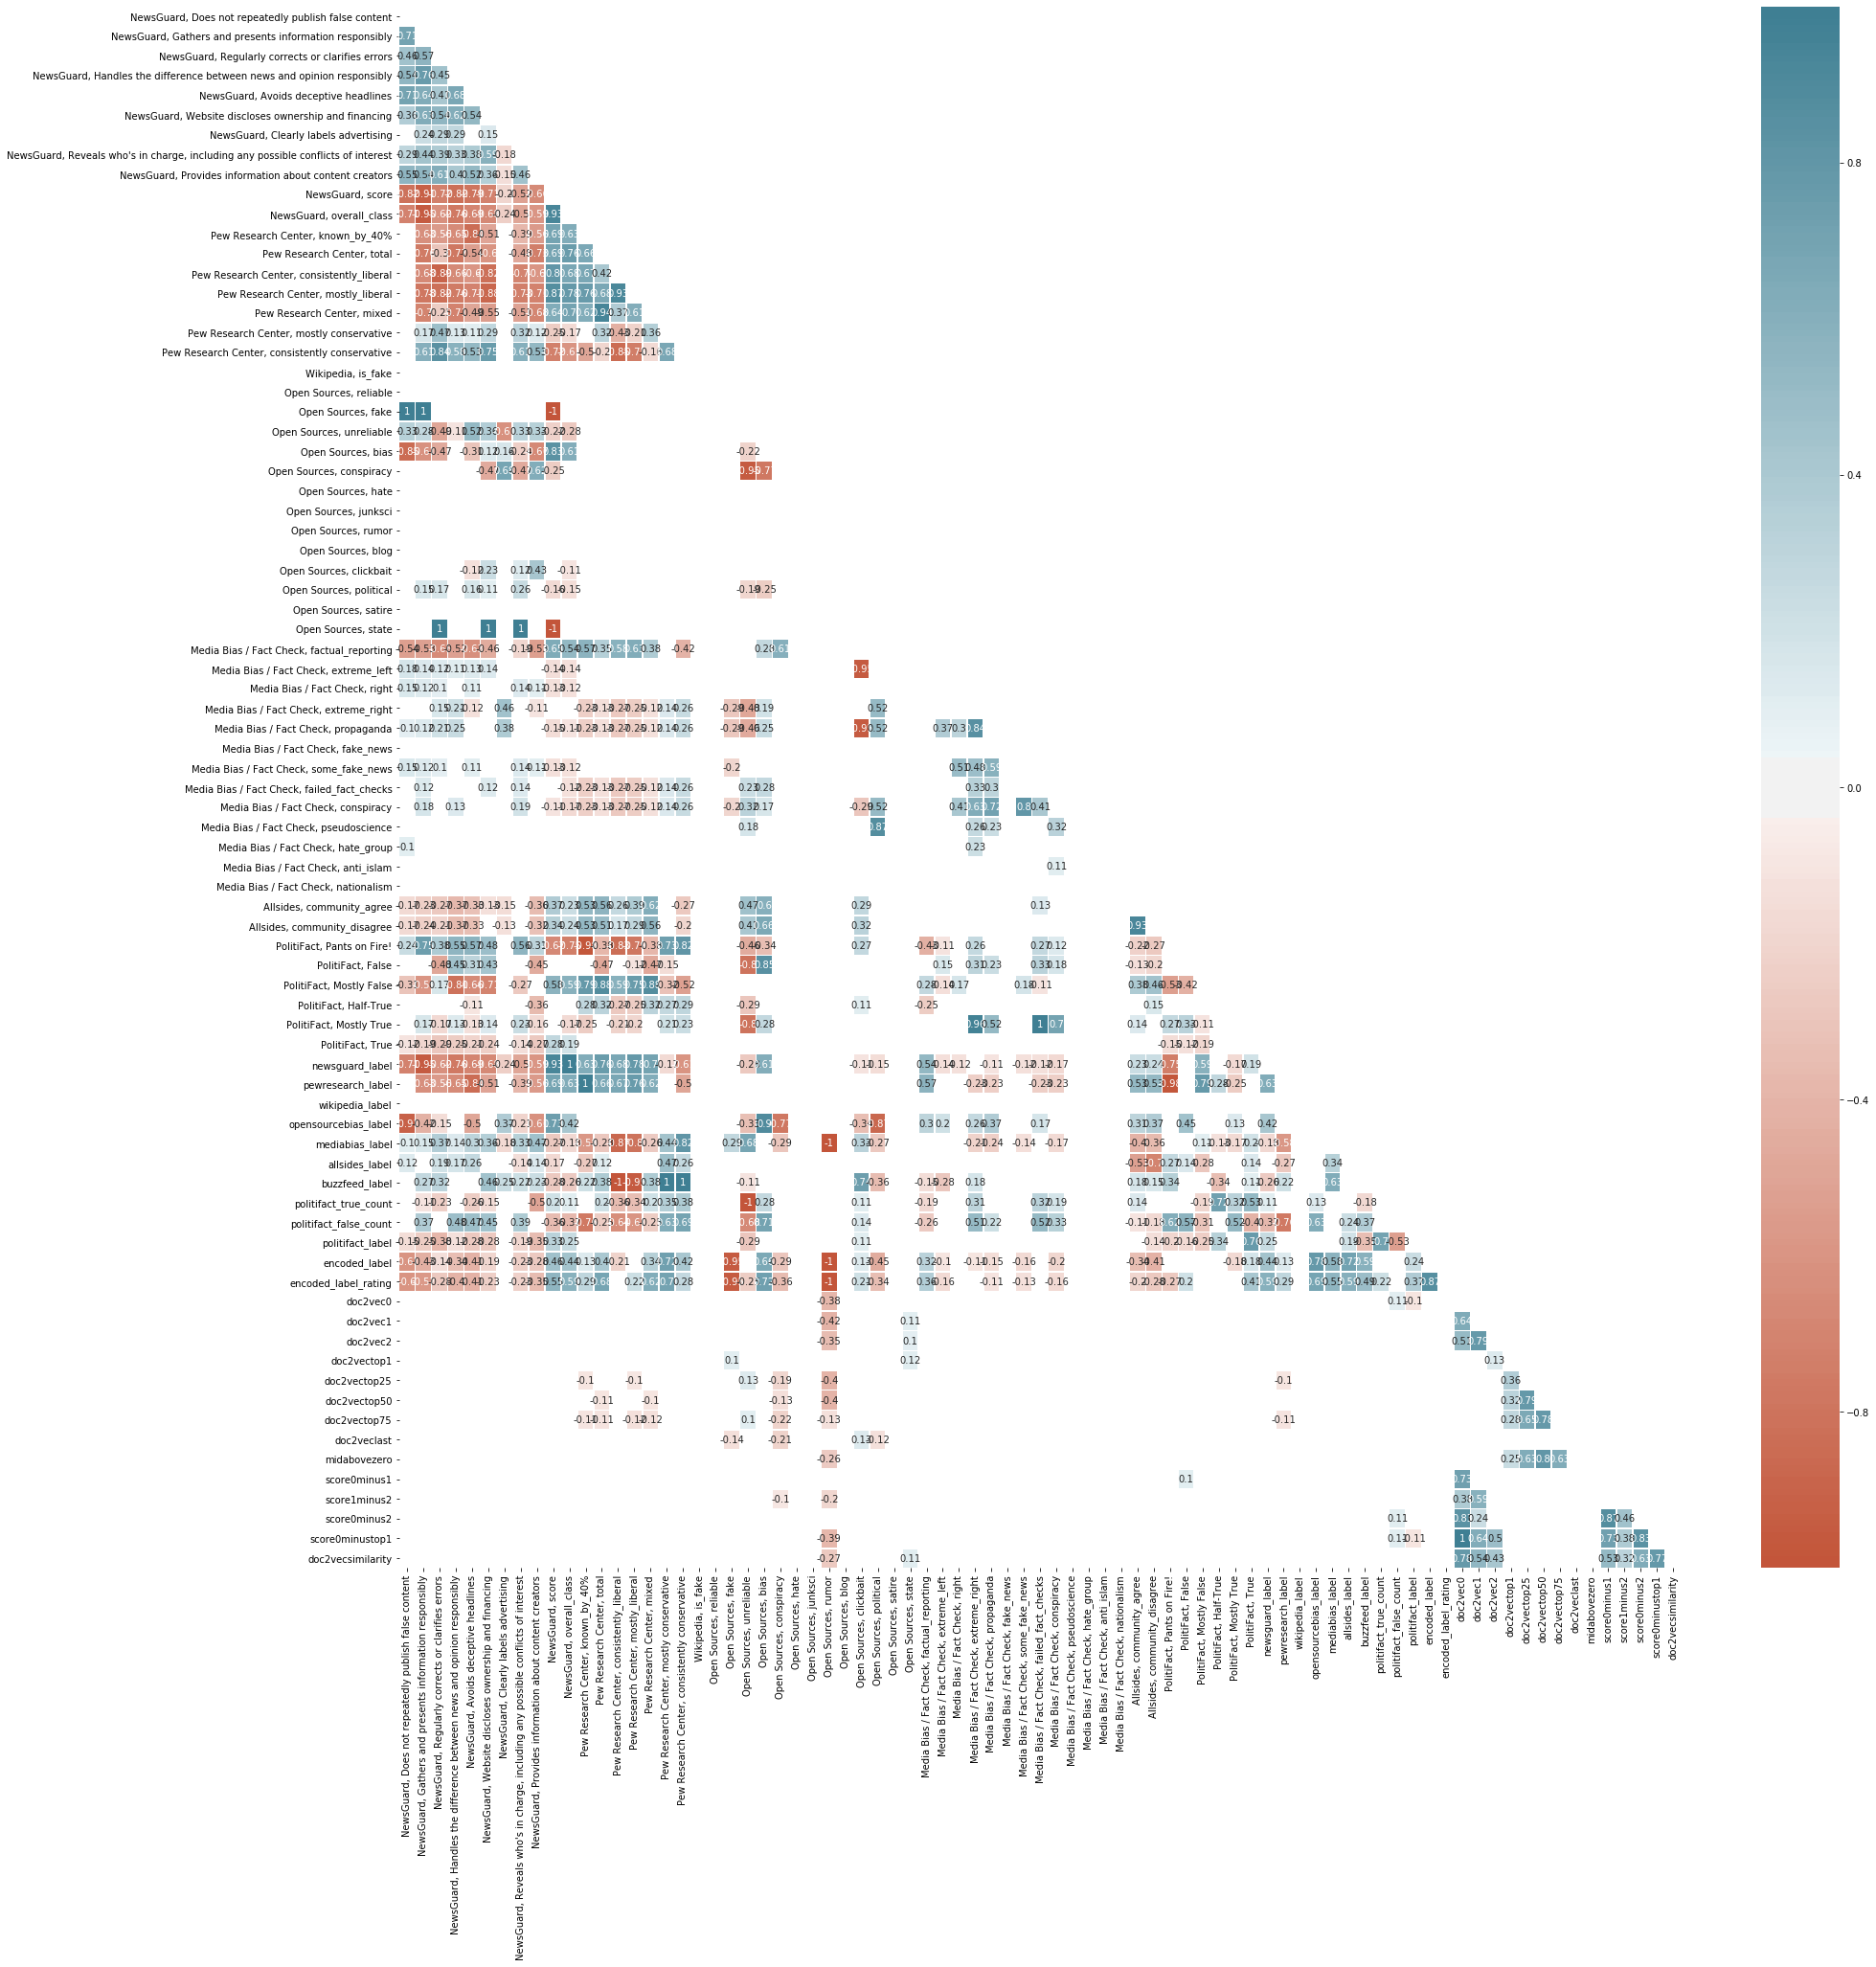

In [0]:
Cor = train_news[train_news.columns] 
#Calculate the correlation of the above variables
cor = Cor.corr() 
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Plot the correlation as heat map
fig, ax = plt.subplots(figsize=(30,30)) 
sns.heatmap(cor[(cor >= 0.10) | (cor <= -0.10)], mask=mask, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), annot=True,linewidths=.5, ax=ax)

## Supervised Training Preparation: Data Curation 

### Measuring Performance using Classification Models and Algorithms

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")

In [0]:
global accscore
scoredf = pd.DataFrame(columns=['Classification Model', 'Naive Bayes', 'SVM', 'SGD', 'Logistic Regression', 'Random Forest']) 
scoredf.at[0, 'Classification Model'] = 'CountVectorizer'
scoredf.at[1, 'Classification Model'] = 'TFIDF'
scoredf.at[2, 'Classification Model'] = 'Doc2Vector'

scoredf_nela = pd.DataFrame(columns=['Classification Model', 'Naive Bayes', 'SVM', 'SGD', 'Logistic Regression', 'Random Forest']) 
scoredf_nela.at[0, 'Classification Model'] = 'TFIDF'


def calculate_score(y_test, y_pred):
    global accscore
    scores = []
    confusion = np.array([[0,0],[0,0]])
    score(y_test, y_pred, average='macro')
    precision, recall, fscore, support = score(y_test, y_pred)
    
    accscore = accuracy_score(y_test,y_pred)*100
    print('accuracy: {}'.format(accscore))
    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
        
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

### CountVectorizer with Mutinomial Naive Bayes

accuracy: 50.184501845018445
precision: [0.5034965  0.50125313]
recall: [0.26568266 0.73800738]
fscore: [0.34782609 0.59701493]
support: [271 271]


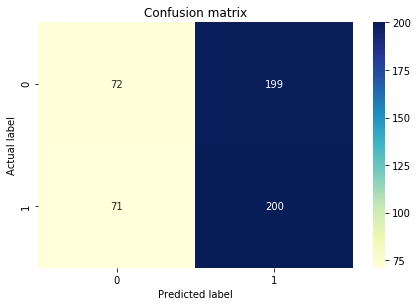

In [0]:
vectorizer = CountVectorizer(ngram_range=(1, 5))
nb_pipeline = Pipeline([
        ('vector', vectorizer),
        ('mname',MultinomialNB())
        ])

nb_pipeline.fit(train_news['clean'],train_news['doc2vecsimilarity'])
predicted_nb = nb_pipeline.predict(test_news['clean'])
np.mean(predicted_nb == test_news['doc2vecsimilarity'])
calculate_score(test_news['doc2vecsimilarity'], predicted_nb)
scoredf.at[0, 'Naive Bayes'] = accscore

### CountVectorizer with Logistic Regression

accuracy: 49.07749077490775
precision: [0.49185668 0.4893617 ]
recall: [0.55719557 0.42435424]
fscore: [0.52249135 0.45454545]
support: [271 271]


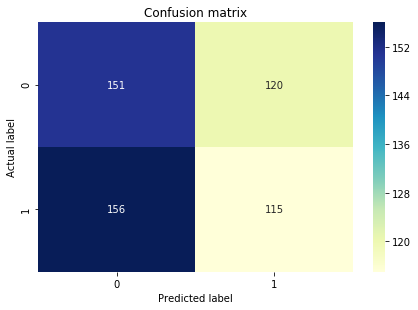

In [0]:
logR_pipeline = Pipeline([
        ('vector', vectorizer),
        ('mname',LogisticRegression())
        ])

logR_pipeline.fit(train_news['clean'],train_news['doc2vecsimilarity'])
predicted_LogR = logR_pipeline.predict(test_news['clean'])
np.mean(predicted_LogR == test_news['doc2vecsimilarity'])
calculate_score(test_news['doc2vecsimilarity'], predicted_LogR)
scoredf.at[0, 'Logistic Regression'] = accscore

### CountVectorizer with Linear SVC

accuracy: 48.708487084870846
precision: [0.48909657 0.4841629 ]
recall: [0.57933579 0.39483395]
fscore: [0.53040541 0.43495935]
support: [271 271]


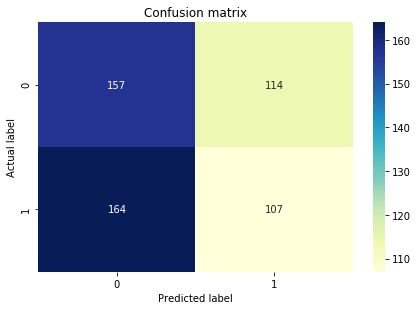

In [0]:
svm_pipeline = Pipeline([
        ('vector', vectorizer),
        ('mname',svm.LinearSVC())
        ])

svm_pipeline.fit(train_news['clean'],train_news['doc2vecsimilarity'])
predicted_svm = svm_pipeline.predict(test_news['clean'])
np.mean(predicted_svm == test_news['doc2vecsimilarity'])
calculate_score(test_news['doc2vecsimilarity'], predicted_svm)
scoredf.at[0, 'SVM'] = accscore

### CountVectorizer with SGD

accuracy: 49.6309963099631
precision: [0.49618321 0.49642857]
recall: [0.4797048  0.51291513]
fscore: [0.48780488 0.50453721]
support: [271 271]


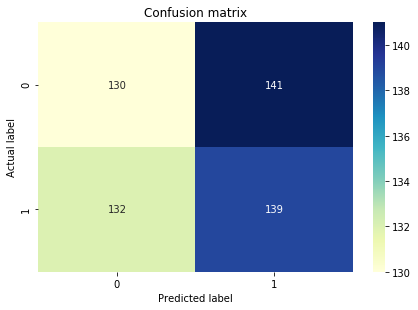

In [0]:
sgd_pipeline = Pipeline([
        ('vector', vectorizer),
        ('mname',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))
        ])

sgd_pipeline.fit(train_news['clean'],train_news['doc2vecsimilarity'])
predicted_sgd = sgd_pipeline.predict(test_news['clean'])
np.mean(predicted_sgd == test_news['doc2vecsimilarity'])
calculate_score(test_news['doc2vecsimilarity'], predicted_sgd)
scoredf.at[0, 'SGD'] = accscore


### CountVectorizer with Random Forest

In [0]:
'''

random_forest = Pipeline([
        ('vector', vectorizer),
        ('mname',RandomForestClassifier(n_estimators=100,n_jobs=3))
        ])

random_forest.fit(train_news['clean'],train_news['doc2vecsimilarity'])
predicted_rf = random_forest.predict(test_news['clean'])
np.mean(predicted_rf == test_news['doc2vecsimilarity'])
calculate_score(test_news['doc2vecsimilarity'], predicted_rf)
'''
scoredf.at[0, 'Random Forest'] = accscore

### CountVectorizer Classification Report

In [0]:
print("\n Classification Report of Naives Bayes regression: \n")
print(classification_report(test_news['doc2vecsimilarity'], predicted_nb))
print("\n Classification Report of Logistic regression: \n")
print(classification_report(test_news['doc2vecsimilarity'], predicted_LogR))
print("\n Classification Report of Linear SVM Classifier: \n")
print(classification_report(test_news['doc2vecsimilarity'], predicted_svm))
print("\n Classification Report of Stochastic Gradient Descent: \n")
print(classification_report(test_news['doc2vecsimilarity'], predicted_sgd))
#print("\n Classification Report of RandomForestClassifier: \n")
#print(classification_report(test_news['doc2vecsimilarity'], predicted_rf))


 Classification Report of Naives Bayes regression: 

              precision    recall  f1-score   support

           0       0.50      0.27      0.35       271
           1       0.50      0.74      0.60       271

    accuracy                           0.50       542
   macro avg       0.50      0.50      0.47       542
weighted avg       0.50      0.50      0.47       542


 Classification Report of Logistic regression: 

              precision    recall  f1-score   support

           0       0.49      0.56      0.52       271
           1       0.49      0.42      0.45       271

    accuracy                           0.49       542
   macro avg       0.49      0.49      0.49       542
weighted avg       0.49      0.49      0.49       542


 Classification Report of Linear SVM Classifier: 

              precision    recall  f1-score   support

           0       0.49      0.58      0.53       271
           1       0.48      0.39      0.43       271

    accuracy              

### TFIDF Vectorizer with Mutinomial Naive Bayes

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfV = TfidfVectorizer(ngram_range = (1,2), sublinear_tf = True)

In [0]:
train_tfidf = tfidfV.fit_transform(train_news['clean'])
print('Training dim:', train_tfidf.shape)
print(train_tfidf.A[:10])

test_tfidf = tfidfV.fit_transform(test_news['clean'])
print('Test dim:', test_tfidf.shape)
print(test_tfidf.A[:10])

Training dim: (3067, 583681)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Test dim: (542, 129933)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
tfidf_feature = tfidfV.get_feature_names()
print(tfidf_feature[:25])

['aac', 'aac http', 'aac watch', 'aajc', 'aajc becomea', 'aajc ethnic', 'aajc mexican', 'aaron', 'aaron boon', 'aaron cresswel', 'aaron kesel', 'aaron nusbaum', 'aaronson', 'aaronson author', 'aback', 'aback giuliani', 'abandon', 'abandon attempt', 'abandon christian', 'abandon claim', 'abandon dccc', 'abandon jesus', 'abandon nuclear', 'abandon oper', 'abandon partial']


accuracy: 48.154981549815496
precision: [0.45283019 0.48853211]
recall: [0.17712177 0.78597786]
fscore: [0.25464191 0.60254597]
support: [271 271]


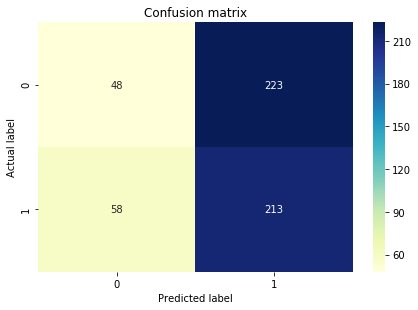

In [0]:
nb_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',MultinomialNB())])

nb_pipeline_ngram.fit(train_news['clean'], train_news['doc2vecsimilarity'])
predicted_nb_ngram = nb_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_nb_ngram == test_news['doc2vecsimilarity'])
calculate_score(test_news['doc2vecsimilarity'], predicted_nb_ngram)
scoredf.at[1, 'Naive Bayes'] = accscore


### TFIDF Vectorizer with LR

accuracy: 48.154981549815496
precision: [0.4754902 0.4852071]
recall: [0.35793358 0.60516605]
fscore: [0.40842105 0.53858785]
support: [271 271]


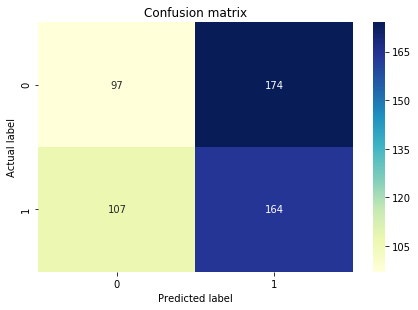

In [0]:
logR_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',LogisticRegression())
        ])
logR_pipeline_ngram.fit(train_news['clean'],train_news['doc2vecsimilarity'])
predicted_LogR_ngram = logR_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_LogR_ngram == test_news['doc2vecsimilarity'])
calculate_score(test_news['doc2vecsimilarity'], predicted_LogR_ngram)
scoredf.at[1, 'Logistic Regression'] = accscore


### TFIDF Vectorizer with Linear SVC

accuracy: 49.815498154981555
precision: [0.49790795 0.49834983]
recall: [0.43911439 0.55719557]
fscore: [0.46666667 0.5261324 ]
support: [271 271]


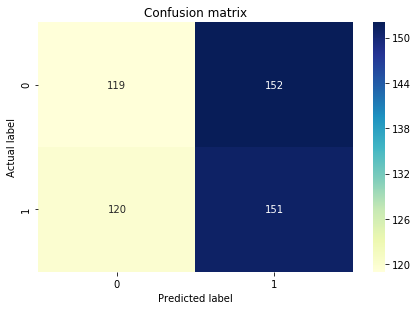

In [0]:
svm_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',svm.LinearSVC())
        ])

svm_pipeline_ngram.fit(train_news['clean'],train_news['doc2vecsimilarity'])
predicted_svm_ngram = svm_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_svm_ngram == test_news['doc2vecsimilarity'])
calculate_score(test_news['doc2vecsimilarity'], predicted_svm_ngram)
scoredf.at[1, 'SVM'] = accscore


### TFIDF Vectorizer with SGD

accuracy: 50.184501845018445
precision: [0.51515152 0.50098232]
recall: [0.06273063 0.94095941]
fscore: [0.11184211 0.65384615]
support: [271 271]


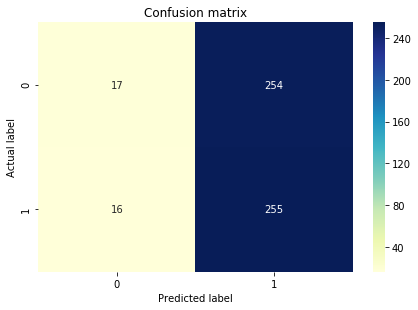

In [0]:
sgd_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))
        ])

sgd_pipeline_ngram.fit(train_news['clean'],train_news['doc2vecsimilarity'])
predicted_sgd_ngram = sgd_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_sgd_ngram == test_news['doc2vecsimilarity'])
calculate_score(test_news['doc2vecsimilarity'], predicted_sgd_ngram)
scoredf.at[1, 'SGD'] = accscore


### TFIDF Vectorizer with Random Forest

In [0]:
'''
random_forest_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',RandomForestClassifier(n_estimators=100,n_jobs=3))
        ])
    
random_forest_ngram.fit(train_news['clean'],train_news['doc2vecsimilarity'])
predicted_rf_ngram = random_forest_ngram.predict(test_news['clean'])
np.mean(predicted_rf_ngram == test_news['doc2vecsimilarity'])
calculate_score(test_news['doc2vecsimilarity'], predicted_rf_ngram)
'''
scoredf.at[1, 'Random Forest'] = accscore

### Classification Report for TFIDF approach

In [0]:
print("\n Classification Report of Naives Bayes regression: \n")
print(classification_report(test_news['doc2vecsimilarity'], predicted_nb))
print("\n Classification Report of Logistic regression: \n")
print(classification_report(test_news['doc2vecsimilarity'], predicted_LogR))
print("\n Classification Report of Linear SVM Classifier: \n")
print(classification_report(test_news['doc2vecsimilarity'], predicted_svm))
print("\n Classification Report of Stochastic Gradient Descent: \n")
print(classification_report(test_news['doc2vecsimilarity'], predicted_sgd))
#print("\n Classification Report of RandomForestClassifier: \n")
#print(classification_report(test_news['doc2vecsimilarity'], predicted_rf))


 Classification Report of Naives Bayes regression: 

              precision    recall  f1-score   support

           0       0.50      0.27      0.35       271
           1       0.50      0.74      0.60       271

    accuracy                           0.50       542
   macro avg       0.50      0.50      0.47       542
weighted avg       0.50      0.50      0.47       542


 Classification Report of Logistic regression: 

              precision    recall  f1-score   support

           0       0.49      0.56      0.52       271
           1       0.49      0.42      0.45       271

    accuracy                           0.49       542
   macro avg       0.49      0.49      0.49       542
weighted avg       0.49      0.49      0.49       542


 Classification Report of Linear SVM Classifier: 

              precision    recall  f1-score   support

           0       0.49      0.58      0.53       271
           1       0.48      0.39      0.43       271

    accuracy              

### Doc2Vector Approach

In [0]:
def tag_docs(docs, col):
    tagged = docs.apply(lambda r: TaggedDocument(words=r[col].split(" "), tags=[r['doc2vecsimilarity']]), axis=1)
    return tagged

In [0]:
train_tagged = train_news.apply(lambda r: TaggedDocument(words=r['clean'].split(" "), 
                                                         tags=[r['doc2vecsimilarity']]), axis=1) 
doc2vectraintagvales = train_tagged.values
print("Train Tags: ", doc2vectraintagvales[10])
doc2VecModel = Doc2Vec(doc2vectraintagvales, size=1, window=100, iter=20, dm=1)

Train Tags:  TaggedDocument(['new', 'york', 'republican', 'state', 'committe', 'purchas', 'one', 'way', 'bus', 'ticket', 'canada', 'governor', 'andrew', 'cuomo', 'respons', 'comment', 'america', 'never', 'great', 'group', 'say', 'new', 'york', 'gop', 'post', 'copi', 'ticket', 'issu', 'andrew', 'cuomo', 'adirondack', 'trailway', 'bus', 'ride', 'albani', 'montreal', 'quebec', 'along', 'press', 'releas', 'slam', 'governor', 'statement', 'disparag', 'unit', 'state', 'valu', 'ticket', 'valid', 'friday', 'august', 'chip', 'one', 'way', 'ticket', 'canada', 'andrew', 'cuomo', 'group', 'wrote', 'twitter', 'donat', 'love', 'leav', 'that', 'choic', 'cuomo', 'said', 'new', 'york', 'gop', 'spokeswoman', 'jessica', 'proud', 'dont', 'think', 'america', 'ever', 'great', 'dont', 'appreci', 'extraordinari', 'gift', 'famili', 'got', 'there', 'bus', 'ticket', 'canada', 'wait', 'truli', 'believ', 'america', 'stay', 'apolog', 'new', 'york', 'school', 'child', 'parent', 'american', 'advanc', 'hate', 'america

In [0]:
def train_doc2vec_model(tagged_docs, window, size):
    doc2vectraintagvales = tagged_docs.values
    doc2vec_model = Doc2Vec(doc2vectraintagvales, size=size, window=window, iter=20, dm=1)
    return doc2vec_model
def doc2vec_regressor(doc2vec_model, tagged_docs):
    doc2vectraintagvales = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in doc2vectraintagvales])
    return targets, regressors


In [0]:
train_tagged = tag_docs(train_news, 'clean')
test_tagged = tag_docs(test_news, 'clean')
doc2VecModel = train_doc2vec_model(train_tagged, 100, 1)
y_train, X_train = doc2vec_regressor(doc2VecModel, train_tagged)
y_test, X_test = doc2vec_regressor(doc2VecModel, test_tagged)

In [0]:
print("\n X train dim: ", len(X_train))
print("\n y train dim: ", len(y_train))
print("\n X test dim: ", len(X_test))
print("\n y test dim:", len(y_test))


 X train dim:  3067

 y train dim:  3067

 X test dim:  542

 y test dim: 542


### Doc2Vector approach for LR

In [0]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy: ", np.mean(y_pred == test_news['doc2vecsimilarity']))
print(confusion_matrix(y_test,y_pred))
accscore = accuracy_score(y_test,y_pred) * 100
scoredf.at[2, 'Logistic Regression'] = accscore

Accuracy:  0.47601476014760147
[[146 125]
 [159 112]]


### Doc2Vector approach for Linear SVC

In [0]:
svm_lin = svm.LinearSVC()
svm_lin.fit(X_train, y_train)
y_pred = svm_lin.predict(X_test)
print("Accuracy: ", np.mean(y_pred == test_news['doc2vecsimilarity']))
print(confusion_matrix(y_test,y_pred))
accscore = accuracy_score(y_test,y_pred) * 100
scoredf.at[2, 'SVM'] = accscore

Accuracy:  0.47601476014760147
[[146 125]
 [159 112]]


### Doc2Vector approach for NB

In [0]:
naivebayes = svm.LinearSVC()
naivebayes.fit(X_train, y_train)
y_pred = naivebayes.predict(X_test)
print("Accuracy: ", np.mean(y_pred == test_news['doc2vecsimilarity']))
print(confusion_matrix(y_test,y_pred))
accscore = accuracy_score(y_test,y_pred) * 100
scoredf.at[2, 'Naive Bayes'] = accscore

Accuracy:  0.47601476014760147
[[146 125]
 [159 112]]


### Doc2Vector approach for Random Forest

In [0]:
#random forest
'''

r_forest = RandomForestClassifier(n_estimators=50,n_jobs=3)
r_forest.fit(X_train, y_train)
y_pred = r_forest.predict(X_test)
print("Accuracy: ", np.mean(y_pred == test_news['doc2vecsimilarity']))
confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
accscore = accuracy_score(y_test,y_pred) * 100
'''
scoredf.at[2, 'Random Forest'] = accscore

### Doc2Vector approach for SGD

In [0]:
sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print("Accuracy: ", np.mean(y_pred == test_news['doc2vecsimilarity']))
confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
accscore = accuracy_score(y_test,y_pred) * 100
scoredf.at[2, 'SGD'] = accscore

Accuracy:  0.470479704797048
[[201  70]
 [217  54]]


In [0]:
scoredf.head()

Classification Model Naive Bayes      SVM      SGD Logistic Regression  \
0      CountVectorizer     50.1845  48.7085   49.631             49.0775   
1                TFIDF      48.155  49.8155  50.1845              48.155   
2           Doc2Vector     47.6015  47.6015   47.048             47.6015   

  Random Forest  
0        49.631  
1       50.1845  
2       47.6015

### Comparision of the Classfication Approaches for News Coverage Feature.
 Doc2Vector Model has mostly high accuracy scores compared to the CountVectorizer and TFIDF. The Accuracy score is higher around 52% for most of the algorithms, Multinomial NB with TFIDF has the hightest accuracy score overall. So either TFIDF or Doc2Vector Approach could be considered for the feature evaluation. I am choosing TFIDF with Mutinomial Naive Bayes alogorigm for the feature prediction

### Run Class Script NewsCoverage.py. It creates the pickle model for News Coverage feature
A class for NewsCoverage Feature is implemented to predict the model using TFIDF Vectorizer and Multinomial Naive Bayes Algorithm. When the python script is run, it will create the pkl file for the object.


In [0]:
%run -i './classes/NewsCoverage.py'

News Coverage Feature Prediction - accuracy:   0.481550
(True, 0.5127541303408525) US-Chinese relations go down to Ice Age
(False, 0.4084054150961427) Microsoft Urges US Government to Regulate Facial Recognition Technology


<Figure size 432x288 with 0 Axes>

### Import the package NewsCoverage and check the True, False NewsCoverage Prediction


In [0]:
from classes import NewsCoverage
nc = NewsCoverage()

News Coverage Feature Prediction - accuracy:   0.481550


In [0]:
for i in range(0,20):
    txt = train_news['name'][i]
    print(nc.predict(txt), txt)
    

(True, 0.5127541303408525) US-Chinese relations go down to Ice Age
(False, 0.4084054150961427) Microsoft Urges US Government to Regulate Facial Recognition Technology
(True, 0.5051967066162617) There Are Fears About an Oil Spike Above 150
(True, 0.5061916483001098) Mauricio Pochettino ready for apostoughestapos season yet at Tottenham aposI am a winner and
(True, 0.6422016279588386) New Findings On Loan Forgiveness Puerto Rico Schools After Maria DeVos Calls For Free-Speech
(False, 0.3971924579712876) Recent polls on public support for Roe v Wade are likely inaccurate
(False, 0.49700303454438716) For emerging market investors US sanctions on Russia will not pack same punch
(True, 0.5041199710504318) US bank regulators propose easing capital rule restricting leverage
(False, 0.4858447841876552) Bourbon On The Rocks 10-4-2018
(False, 0.45928621180061013) BQ leader agrees to earlier vote on her leadership
(True, 0.6829091761920755) Republicans Buy Cuomo One-Way Ticket to Canada
(False, 0.

### Import Pickle file and compare

In [0]:
ncp = pickle.load(open(newscoverage_filename_pkl, 'rb'))
for i in range(0,20):
    txt = train_news['name'][i]
    print(ncp.predict(txt), txt)


(True, 0.5127541303408525) US-Chinese relations go down to Ice Age
(False, 0.4084054150961427) Microsoft Urges US Government to Regulate Facial Recognition Technology
(True, 0.5051967066162617) There Are Fears About an Oil Spike Above 150
(True, 0.5061916483001098) Mauricio Pochettino ready for apostoughestapos season yet at Tottenham aposI am a winner and
(True, 0.6422016279588386) New Findings On Loan Forgiveness Puerto Rico Schools After Maria DeVos Calls For Free-Speech
(False, 0.3971924579712876) Recent polls on public support for Roe v Wade are likely inaccurate
(False, 0.49700303454438716) For emerging market investors US sanctions on Russia will not pack same punch
(True, 0.5041199710504318) US bank regulators propose easing capital rule restricting leverage
(False, 0.4858447841876552) Bourbon On The Rocks 10-4-2018
(False, 0.45928621180061013) BQ leader agrees to earlier vote on her leadership
(True, 0.6829091761920755) Republicans Buy Cuomo One-Way Ticket to Canada
(False, 0.

## Sensational Feature Integration

In [0]:
corpus = []
for i in train_news['clean']:
    corpus.append(i)

sensational_corpus=[]
sensational_words = pd.read_csv(sensational_words_filename, sep="\t+", header=None, usecols=[0] )
print(len(sensational_words))
sensational_dictionary = ' '.join(sensational_words[0].astype(str))
sensational_corpus.append(sensational_dictionary)

1443


In [0]:
from sklearn.preprocessing import scale
sentic_net = pd.read_csv(sentic_net_filename, sep="\t+", header=None, usecols=[0,1,2], names = ["Token", "Polarity", "Intensity"])
sentic_net = sentic_net[~sentic_net['Token'].str.contains('|'.join('_'),na=False)]
sentic_net = sentic_net.reset_index(drop=True)
print("Senticnet Vocab Size: ",len(sentic_net))
print(sentic_net.head(10))

Senticnet Vocab Size:  39891
         Token  Polarity  Intensity
0      abandon  negative      -0.84
1    abandoned  negative      -0.85
2  abandonment  negative      -0.82
3        abase  negative      -0.90
4    abasement  negative      -0.90
5        abash  negative      -0.77
6      abashed  negative      -0.92
7    abashment  negative      -0.76
8       abasia  negative      -0.67
9        abate  negative      -0.86


In [0]:
senti_pos = sentic_net.loc[sentic_net.Polarity == "positive"]
senti_pos = senti_pos.loc[senti_pos.Intensity > 0.90]
dictionary = ' '.join(senti_pos.Token.astype(str))
sensational_corpus.append(dictionary)
print(len(senti_pos))

2040


### TF-IDF and Cosine Similarity

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVec = TfidfVectorizer(max_features=1000)

tfidf_corpus = tfidfVec.fit_transform(corpus)
tf_idf_senti = tfidfVec.fit_transform(sensational_corpus)
words = tfidfVec.get_feature_names()

In [0]:
tfidf_corpus.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05222484, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02903994, 0.        , 0.        , ..., 0.        , 0.03209639,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.30637191],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [0]:
tf_idf_senti.toarray()

array([[0.02934579, 0.05869158, 0.05869158, ..., 0.        , 0.        ,
        0.08803737],
       [0.        , 0.        , 0.        , ..., 0.19269152, 0.06423051,
        0.        ]])

In [0]:
train_tfidf = tfidfVec.fit_transform(train_news['clean'])
print('Training dim:', train_tfidf.shape)
print(train_tfidf.A[:10])


test_tfidf = tfidfVec.fit_transform(test_news['clean'])
print('Test dim:', test_tfidf.shape)
print(test_tfidf.A[:10])


Training dim: (3067, 1000)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.05222484 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Test dim: (542, 1000)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.13515678]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.24225275 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [0]:
# from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
similarity_score = []
for i in range(len(train_tfidf.toarray())):
    similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))

In [0]:
train_news['sensational_score'] = similarity_score
train_news.head(5)

date            source  \
0  2018-10-10    Pravada Report   
1  2018-07-15           Sputnik   
2  2018-07-06           Fortune   
3  2018-08-16  Evening Standard   
4  2018-09-22               NPR   

                                                name  \
0            US-Chinese relations go down to Ice Age   
1  Microsoft Urges US Government to Regulate Faci...   
2       There Are Fears About an Oil Spike Above 150   
3  Mauricio Pochettino ready for apostoughestapos...   
4  New Findings On Loan Forgiveness Puerto Rico S...   

                                             content  \
0  The Trump administration plans to limit China'...   
1  "Facial-recognition technology raises issues t...   
2  Oil investors may regret urging companies to c...   
3  Mauricio Pochettino has warned that this seaso...   
4  New Findings On Loan Forgiveness; Puerto Rico ...   

   NewsGuard, Does not repeatedly publish false content  \
0                                                NaN      
1                                                1.0      
2                                                0.0      
3                                                NaN      
4                                                0.0      

   NewsGuard, Gathers and presents information responsibly  \
0                                                NaN         
1                                                1.0         
2                                                0.0         
3                                                NaN         
4                                                0.0         

   NewsGuard, Regularly corrects or clarifies errors  \
0                                                NaN   
1                                                1.0   
2                                                0.0   
3                                                NaN   
4                                                0.0   

   NewsGuard, Handles the difference between news and opinion responsibly  \
0                                                NaN                        
1                                                1.0                        
2                                                0.0                        
3                                                NaN                        
4                                                0.0                        

   NewsGuard, Avoids deceptive headlines  \
0                                    NaN   
1                                    1.0   
2                                    0.0   
3                                    NaN   
4                                    0.0   

   NewsGuard, Website discloses ownership and financing  \
0                                                NaN      
1                                                1.0      
2                                                0.0      
3                                                NaN      
4                                                0.0      

   NewsGuard, Clearly labels advertising  \
0                                    NaN   
1                                    0.0   
2                                    0.0   
3                                    NaN   
4                                    0.0   

   NewsGuard, Reveals who's in charge, including any possible conflicts of interest  \
0                                                NaN                                  
1                                                1.0                                  
2                                                0.0                                  
3                                                NaN                                  
4                                                0.0                                  

   NewsGuard, Provides information about content creators  NewsGuard, score  \
0                                                NaN                    NaN   
1                             

In [0]:
corpus = []
for i in test_news['clean']:
    corpus.append(i)
# corpus

tfidf_corpus = tfidfVec.fit_transform(corpus)

similarity_score = []
for i in range(len(test_tfidf.toarray())):
    similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))
    
test_news['sensational_score'] = similarity_score
test_news.head(5)

date        source  \
0  2018-02-20       Sputnik   
1  2018-04-24           CNN   
2  2018-10-12       The Sun   
3  2018-10-04  Pink News UK   
4  2018-08-29          CNBC   

                                                name  \
0  Abbas Leaves UNSC After Palestinian Statehood ...   
1  Texas sets June special election to replace Fa...   
2  Thousands of homeowners overpaying mortgage by...   
3  Hillary Clinton lays into racist sexist anti-L...   
4  Court rejects failed GOP candidate Don Blanken...   

                                             content  \
0  The main subject of Abbas' Tuesday speech was ...   
1  Texas GOP Gov. Greg Abbott on Tuesday set a sp...   
2  THOUSANDS of homeowners are overpaying on thei...   
3  Signup to receive a daily roundup of the top L...   
4  Republicans are looking to expand their majori...   

   NewsGuard, Does not repeatedly publish false content  \
0                                                1.0      
1                                                0.0      
2                                                NaN      
3                                                NaN      
4                                                0.0      

   NewsGuard, Gathers and presents information responsibly  \
0                                                1.0         
1                                                0.0         
2                                                NaN         
3                                                NaN         
4                                                0.0         

   NewsGuard, Regularly corrects or clarifies errors  \
0                                                1.0   
1                                                0.0   
2                                                NaN   
3                                                NaN   
4                                                0.0   

   NewsGuard, Handles the difference between news and opinion responsibly  \
0                                                1.0                        
1                                                0.0                        
2                                                NaN                        
3                                                NaN                        
4                                                0.0                        

   NewsGuard, Avoids deceptive headlines  \
0                                    1.0   
1                                    0.0   
2                                    NaN   
3                                    NaN   
4                                    0.0   

   NewsGuard, Website discloses ownership and financing  \
0                                                1.0      
1                                                0.0      
2                                                NaN      
3                                                NaN      
4                                                0.0      

   NewsGuard, Clearly labels advertising  \
0                                    0.0   
1                                    0.0   
2                                    NaN   
3                                    NaN   
4                                    0.0   

   NewsGuard, Reveals who's in charge, including any possible conflicts of interest  \
0                                                1.0                                  
1                                                0.0                                  
2                                                NaN                                  
3                                                NaN                                  
4                                                1.0                                  

   NewsGuard, Provides information about content creators  NewsGuard, score  \
0                                                1.0                    7.5   
1                                                0.0  

### Labelling the sensational feature by considering the 50% of the describe dataframe value.

In [0]:
sensational = [] 
sensationalmidvalue = train_news.describe()['sensational_score']['50%']
for row in train_news['sensational_score']:
    if row > sensationalmidvalue:
        sensational.append(1)
    else:
        sensational.append(0) 

train_news['sensational_label'] = sensational
train_news.head(5)


date            source  \
0  2018-10-10    Pravada Report   
1  2018-07-15           Sputnik   
2  2018-07-06           Fortune   
3  2018-08-16  Evening Standard   
4  2018-09-22               NPR   

                                                name  \
0            US-Chinese relations go down to Ice Age   
1  Microsoft Urges US Government to Regulate Faci...   
2       There Are Fears About an Oil Spike Above 150   
3  Mauricio Pochettino ready for apostoughestapos...   
4  New Findings On Loan Forgiveness Puerto Rico S...   

                                             content  \
0  The Trump administration plans to limit China'...   
1  "Facial-recognition technology raises issues t...   
2  Oil investors may regret urging companies to c...   
3  Mauricio Pochettino has warned that this seaso...   
4  New Findings On Loan Forgiveness; Puerto Rico ...   

   NewsGuard, Does not repeatedly publish false content  \
0                                                NaN      
1                                                1.0      
2                                                0.0      
3                                                NaN      
4                                                0.0      

   NewsGuard, Gathers and presents information responsibly  \
0                                                NaN         
1                                                1.0         
2                                                0.0         
3                                                NaN         
4                                                0.0         

   NewsGuard, Regularly corrects or clarifies errors  \
0                                                NaN   
1                                                1.0   
2                                                0.0   
3                                                NaN   
4                                                0.0   

   NewsGuard, Handles the difference between news and opinion responsibly  \
0                                                NaN                        
1                                                1.0                        
2                                                0.0                        
3                                                NaN                        
4                                                0.0                        

   NewsGuard, Avoids deceptive headlines  \
0                                    NaN   
1                                    1.0   
2                                    0.0   
3                                    NaN   
4                                    0.0   

   NewsGuard, Website discloses ownership and financing  \
0                                                NaN      
1                                                1.0      
2                                                0.0      
3                                                NaN      
4                                                0.0      

   NewsGuard, Clearly labels advertising  \
0                                    NaN   
1                                    0.0   
2                                    0.0   
3                                    NaN   
4                                    0.0   

   NewsGuard, Reveals who's in charge, including any possible conflicts of interest  \
0                                                NaN                                  
1                                                1.0                                  
2                                                0.0                                  
3                                                NaN                                  
4                                                0.0                                  

   NewsGuard, Provides information about content creators  NewsGuard, score  \
0                                                NaN                    NaN   
1                             

In [0]:
sensational = [] 
sensationalmidvalue = test_news.describe()['sensational_score']['50%']
for row in test_news['sensational_score']:
    if row > sensationalmidvalue:
        sensational.append(1)
    else:
        sensational.append(0) 

test_news['sensational_label'] = sensational
test_news.head(5)

date        source  \
0  2018-02-20       Sputnik   
1  2018-04-24           CNN   
2  2018-10-12       The Sun   
3  2018-10-04  Pink News UK   
4  2018-08-29          CNBC   

                                                name  \
0  Abbas Leaves UNSC After Palestinian Statehood ...   
1  Texas sets June special election to replace Fa...   
2  Thousands of homeowners overpaying mortgage by...   
3  Hillary Clinton lays into racist sexist anti-L...   
4  Court rejects failed GOP candidate Don Blanken...   

                                             content  \
0  The main subject of Abbas' Tuesday speech was ...   
1  Texas GOP Gov. Greg Abbott on Tuesday set a sp...   
2  THOUSANDS of homeowners are overpaying on thei...   
3  Signup to receive a daily roundup of the top L...   
4  Republicans are looking to expand their majori...   

   NewsGuard, Does not repeatedly publish false content  \
0                                                1.0      
1                                                0.0      
2                                                NaN      
3                                                NaN      
4                                                0.0      

   NewsGuard, Gathers and presents information responsibly  \
0                                                1.0         
1                                                0.0         
2                                                NaN         
3                                                NaN         
4                                                0.0         

   NewsGuard, Regularly corrects or clarifies errors  \
0                                                1.0   
1                                                0.0   
2                                                NaN   
3                                                NaN   
4                                                0.0   

   NewsGuard, Handles the difference between news and opinion responsibly  \
0                                                1.0                        
1                                                0.0                        
2                                                NaN                        
3                                                NaN                        
4                                                0.0                        

   NewsGuard, Avoids deceptive headlines  \
0                                    1.0   
1                                    0.0   
2                                    NaN   
3                                    NaN   
4                                    0.0   

   NewsGuard, Website discloses ownership and financing  \
0                                                1.0      
1                                                0.0      
2                                                NaN      
3                                                NaN      
4                                                0.0      

   NewsGuard, Clearly labels advertising  \
0                                    0.0   
1                                    0.0   
2                                    NaN   
3                                    NaN   
4                                    0.0   

   NewsGuard, Reveals who's in charge, including any possible conflicts of interest  \
0                                                1.0                                  
1                                                0.0                                  
2                                                NaN                                  
3                                                NaN                                  
4                                                1.0                                  

   NewsGuard, Provides information about content creators  NewsGuard, score  \
0                                                1.0                    7.5   
1                                                0.0  

In [0]:
def create_distribution(dataFile, label):
    return sns.countplot(x=label, data=dataFile, palette="Set3")

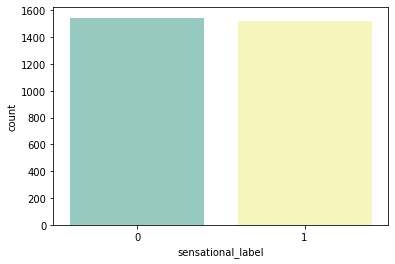

In [0]:
create_distribution(train_news, 'sensational_label')

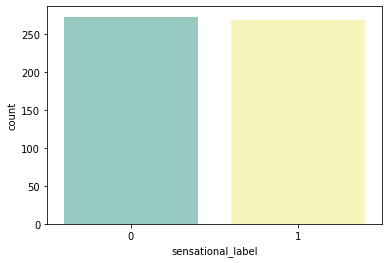

In [0]:
create_distribution(test_news, 'sensational_label')


In [0]:
train_news.to_csv(train_filename_sensational_processed, sep=',')
test_news.to_csv(test_filename_sensational_processed, sep=',')

### Run Class Script SensationalPrediction.py. It creates the pickle model for sensational analysis feature
TFIDF MNB algorithm is being used for the Sensational Analysis Model. When the python script is run, it will create the pkl file for the object.

In [0]:
%run -i './classes/SensationalPrediction.py'

/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/Sudha/Final-Project/models/sensational_feature_av4.pkl
Sensational Feature Prediction - accuracy:   0.531365
(False, 0.28439059303454406) US-Chinese relations go down to Ice Age
(True, 0.7023683760208512) Microsoft Urges US Government to Regulate Facial Recognition Technology


<Figure size 432x288 with 0 Axes>

### Import the package SensationalPrediction and check the True, False Sensational Prediction


In [0]:
from classes import SensationalPrediction
sp = SensationalPrediction()

Sensational Feature Prediction - accuracy:   0.531365


In [0]:
for i in range(0,20):
    txt = train_news['name'][i]
    print(sp.predict(txt), txt)


(False, 0.28439059303454406) US-Chinese relations go down to Ice Age
(True, 0.7023683760208512) Microsoft Urges US Government to Regulate Facial Recognition Technology
(True, 0.6539195720124766) There Are Fears About an Oil Spike Above 150
(True, 0.6486070037855906) Mauricio Pochettino ready for apostoughestapos season yet at Tottenham aposI am a winner and
(True, 0.6765984954322587) New Findings On Loan Forgiveness Puerto Rico Schools After Maria DeVos Calls For Free-Speech
(True, 0.665133152626683) Recent polls on public support for Roe v Wade are likely inaccurate
(True, 0.6223986178307529) For emerging market investors US sanctions on Russia will not pack same punch
(False, 0.341120165817981) US bank regulators propose easing capital rule restricting leverage
(False, 0.31738936193453415) Bourbon On The Rocks 10-4-2018
(False, 0.25914401896287487) BQ leader agrees to earlier vote on her leadership
(False, 0.3903366134998735) Republicans Buy Cuomo One-Way Ticket to Canada
(False, 0.3

### Import Pickle file and compare

In [0]:
spp = pickle.load(open(sensational_filename_pkl, 'rb'))
for i in range(0,20):
    txt = train_news['name'][i]
    print(spp.predict(txt), txt)


(False, 0.28439059303454406) US-Chinese relations go down to Ice Age
(True, 0.7023683760208512) Microsoft Urges US Government to Regulate Facial Recognition Technology
(True, 0.6539195720124766) There Are Fears About an Oil Spike Above 150
(True, 0.6486070037855906) Mauricio Pochettino ready for apostoughestapos season yet at Tottenham aposI am a winner and
(True, 0.6765984954322587) New Findings On Loan Forgiveness Puerto Rico Schools After Maria DeVos Calls For Free-Speech
(True, 0.665133152626683) Recent polls on public support for Roe v Wade are likely inaccurate
(True, 0.6223986178307529) For emerging market investors US sanctions on Russia will not pack same punch
(False, 0.341120165817981) US bank regulators propose easing capital rule restricting leverage
(False, 0.31738936193453415) Bourbon On The Rocks 10-4-2018
(False, 0.25914401896287487) BQ leader agrees to earlier vote on her leadership
(False, 0.3903366134998735) Republicans Buy Cuomo One-Way Ticket to Canada
(False, 0.3

## Nela Encoded Labels Feature Integration

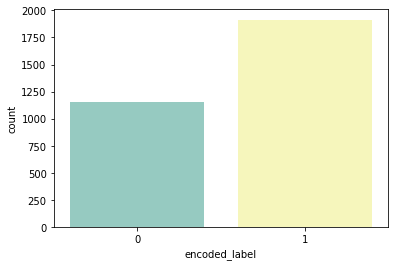

In [0]:
create_distribution(train_news, 'encoded_label')

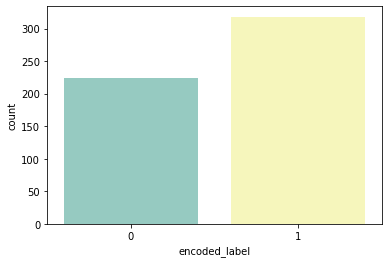

In [0]:
create_distribution(test_news, 'encoded_label')

### TFIDF Vectorizer with Mutinomial Naive Bayes

accuracy: 59.59409594095941
precision: [1.         0.59217877]
recall: [0.02232143 1.        ]
fscore: [0.04366812 0.74385965]
support: [224 318]


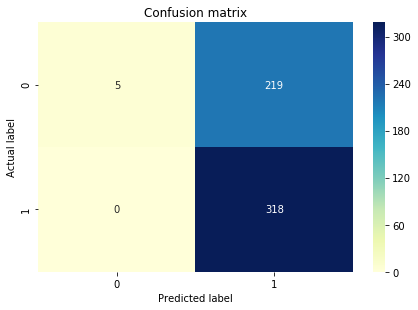

In [0]:
nb_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',MultinomialNB())])

nb_pipeline_ngram.fit(train_news['clean'], train_news['encoded_label'])
predicted_nb_ngram = nb_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_nb_ngram == test_news['encoded_label'])
calculate_score(test_news['encoded_label'], predicted_nb_ngram)
scoredf_nela.at[0, 'Naive Bayes'] = accscore

### TFIDF Vectorizer with LR

accuracy: 62.73062730627307
precision: [0.63414634 0.62608696]
recall: [0.23214286 0.90566038]
fscore: [0.33986928 0.7403599 ]
support: [224 318]


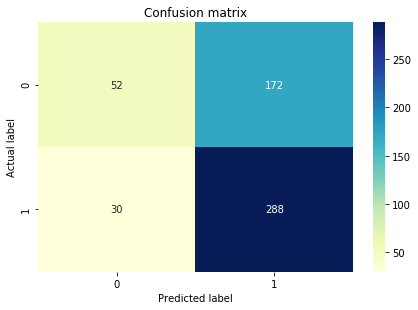

In [0]:
logR_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',LogisticRegression())
        ])
logR_pipeline_ngram.fit(train_news['clean'],train_news['encoded_label'])
predicted_LogR_ngram = logR_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_LogR_ngram == test_news['encoded_label'])
calculate_score(test_news['encoded_label'], predicted_LogR_ngram)
scoredf_nela.at[0, 'Logistic Regression'] = accscore


### TFIDF Vectorizer with Linear SVC


accuracy: 67.34317343173431
precision: [0.63428571 0.69209809]
recall: [0.49553571 0.79874214]
fscore: [0.55639098 0.74160584]
support: [224 318]


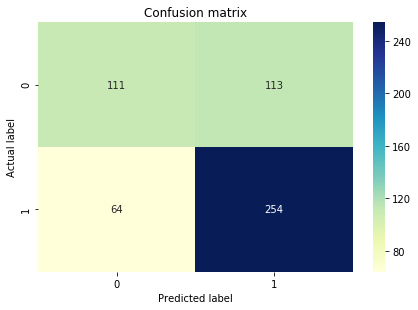

In [0]:
svm_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',svm.LinearSVC())
        ])

svm_pipeline_ngram.fit(train_news['clean'],train_news['encoded_label'])
predicted_svm_ngram = svm_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_svm_ngram == test_news['encoded_label'])
calculate_score(test_news['encoded_label'], predicted_svm_ngram)
scoredf_nela.at[0, 'SVM'] = accscore


### TFIDF Vectorizer with SGD

accuracy: 59.59409594095941
precision: [0.85714286 0.59252336]
recall: [0.02678571 0.99685535]
fscore: [0.05194805 0.74325909]
support: [224 318]


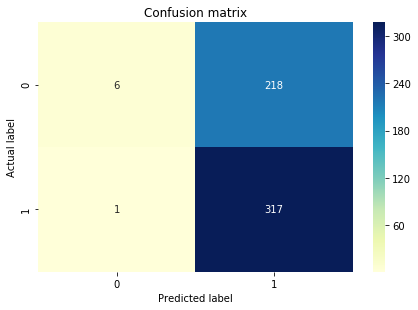

In [0]:
sgd_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))
        ])

sgd_pipeline_ngram.fit(train_news['clean'],train_news['encoded_label'])
predicted_sgd_ngram = sgd_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_sgd_ngram == test_news['encoded_label'])
calculate_score(test_news['encoded_label'], predicted_sgd_ngram)
scoredf_nela.at[0, 'SGD'] = accscore


### TFIDF Vectorizer with Random Forest

In [0]:
'''
random_forest_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',RandomForestClassifier(n_estimators=100,n_jobs=3))
        ])
    
random_forest_ngram.fit(train_news['clean'],train_news['encoded_label'])
predicted_rf_ngram = random_forest_ngram.predict(test_news['clean'])
np.mean(predicted_rf_ngram == test_news['encoded_label'])
calculate_score(test_news['encoded_label'], predicted_rf_ngram)
'''
scoredf_nela.at[0, 'Random Forest'] = accscore

In [0]:
scoredf_nela.head()

Classification Model Naive Bayes      SVM      SGD Logistic Regression  \
0                TFIDF     59.5941  67.3432  59.5941             62.7306   

  Random Forest  
0       59.5941

In [0]:
%run -i './classes/NelaEncodedLabelsPrediction.py'

/content/drive/My Drive/AlternusVeraDataSets2019/FinalExam/Spartans/Sudha/Final-Project/models/nelaencodedlabels_feature_av4.pkl
Nela Encoded Labels Feature Prediction - accuracy:   0.588561
(True, 0.5109545976262648) US-Chinese relations go down to Ice Age
(False, 0.4321227430223354) Microsoft Urges US Government to Regulate Facial Recognition Technology


<Figure size 432x288 with 0 Axes>

### Import the package NelaEncodedLabelsPrediction and check the True, False Prediction


In [0]:
from classes import NelaEncodedLabelsPrediction
nen = NelaEncodedLabelsPrediction()

Nela Encoded Labels Feature Prediction - accuracy:   0.588561


In [0]:
for i in range(0,20):
    txt = train_news['name'][i]
    print(nen.predict(txt), txt)
    

(True, 0.5109545976262648) US-Chinese relations go down to Ice Age
(False, 0.4321227430223354) Microsoft Urges US Government to Regulate Facial Recognition Technology
(True, 0.7749895327684145) There Are Fears About an Oil Spike Above 150
(True, 0.8580664261636184) Mauricio Pochettino ready for apostoughestapos season yet at Tottenham aposI am a winner and
(True, 0.7744599793538535) New Findings On Loan Forgiveness Puerto Rico Schools After Maria DeVos Calls For Free-Speech
(False, 0.38195120473722294) Recent polls on public support for Roe v Wade are likely inaccurate
(True, 0.7702259639549229) For emerging market investors US sanctions on Russia will not pack same punch
(True, 0.7413726067690484) US bank regulators propose easing capital rule restricting leverage
(True, 0.8490968314567188) Bourbon On The Rocks 10-4-2018
(False, 0.4588494638770313) BQ leader agrees to earlier vote on her leadership
(False, 0.45462616638509373) Republicans Buy Cuomo One-Way Ticket to Canada
(False, 0.4

### Import Pickle file and compare

In [0]:
nenp = pickle.load(open(nelaencodedlabelsprediction_filename_pkl, 'rb'))
for i in range(0,20):
    txt = train_news['name'][i]
    print(nenp.predict(txt), txt)


(True, 0.5109545976262648) US-Chinese relations go down to Ice Age
(False, 0.4321227430223354) Microsoft Urges US Government to Regulate Facial Recognition Technology
(True, 0.7749895327684145) There Are Fears About an Oil Spike Above 150
(True, 0.8580664261636184) Mauricio Pochettino ready for apostoughestapos season yet at Tottenham aposI am a winner and
(True, 0.7744599793538535) New Findings On Loan Forgiveness Puerto Rico Schools After Maria DeVos Calls For Free-Speech
(False, 0.38195120473722294) Recent polls on public support for Roe v Wade are likely inaccurate
(True, 0.7702259639549229) For emerging market investors US sanctions on Russia will not pack same punch
(True, 0.7413726067690484) US bank regulators propose easing capital rule restricting leverage
(True, 0.8490968314567188) Bourbon On The Rocks 10-4-2018
(False, 0.4588494638770313) BQ leader agrees to earlier vote on her leadership
(False, 0.45462616638509373) Republicans Buy Cuomo One-Way Ticket to Canada
(False, 0.4

### Loading the saved pickle from the models folder and calculating the polynomial score by appending the valid score and accuracy of the algorithm for  each of the 3 features 

In [0]:
import pickle
ncp = pickle.load(open(newscoverage_filename_pkl, 'rb'))
spp = pickle.load(open(sensational_filename_pkl, 'rb'))
nenp = pickle.load(open(nelaencodedlabelsprediction_filename_pkl, 'rb'))


def isValidNews(name, print_news=True):
    ncscore = ncp.getScore()
    spscore = spp.getScore()
    nenscore = nenp.getScore()
    accur = [ncscore, spscore, nenscore] # using the (normalized) accuracy as weigths for 
    w = [float(i)/sum(accur) for i in accur]
    sumW = 0
    prob = []
    prob.append(w[0] * ncp.predictScore(name))
    sumW += w[0]
    prob.append(w[1] * spp.predictScore(name))
    sumW += w[1]
    prob.append(w[2] * nenp.predictScore(name))
    sumW += w[2]
    probTotal = sum(prob[0:len(prob)]) / sumW
    if print_news is True:
      if probTotal > 0.5:
          print('Valid News:', 'Score:', probTotal, 'name:', name)
      else:
          print('Fake  News:', 'Score:', probTotal, 'name:', name)
        
    return probTotal
    
isValidNews('State police chief accused of gender discrimination mooning staffers')

Valid News: Score: 0.6298148029713512 name: State police chief accused of gender discrimination mooning staffers


0.6298148029713512

In [0]:
for i in range(0,20):
    txt = train_news['name'][i]
    isValidNews(txt)


Fake  News: Score: 0.43632239107798343 name: US-Chinese relations go down to Ice Age
Valid News: Score: 0.5146579039841284 name: Microsoft Urges US Government to Regulate Facial Recognition Technology
Valid News: Score: 0.6536945139626288 name: There Are Fears About an Oil Spike Above 150
Valid News: Score: 0.682762704196743 name: Mauricio Pochettino ready for apostoughestapos season yet at Tottenham aposI am a winner and
Valid News: Score: 0.7022208813313671 name: New Findings On Loan Forgiveness Puerto Rico Schools After Maria DeVos Calls For Free-Speech
Fake  News: Score: 0.480493103454107 name: Recent polls on public support for Roe v Wade are likely inaccurate
Valid News: Score: 0.6390215166508783 name: For emerging market investors US sanctions on Russia will not pack same punch
Valid News: Score: 0.5372301633168981 name: US bank regulators propose easing capital rule restricting leverage
Valid News: Score: 0.5634510531622317 name: Bourbon On The Rocks 10-4-2018
Fake  News: Score

#### Creating a dataframe fot the valid news, predicted score and documents, saving it to a csv file

In [0]:
predictedNewsDf = pd.DataFrame(columns=['valid_news', 'predict_score', 'name'])

for index, row in train_news.iterrows():
    name= row['name']
    pred = isValidNews(name,False)
    predictedNewsDf.at[index, 'valid_news'] = True if pred >= .5 else False
    predictedNewsDf.at[index, 'predict_score'] = pred
    predictedNewsDf.at[index, 'name'] = name
    #if index > 1000 : break

predictedNewsDf.to_csv(predicted_news_processed, sep=',')


In [0]:
predictedNewsDf.head(20)

valid_news predict_score                                               name
0       False      0.436322            US-Chinese relations go down to Ice Age
1        True      0.514658  Microsoft Urges US Government to Regulate Faci...
2        True      0.653695       There Are Fears About an Oil Spike Above 150
3        True      0.682763  Mauricio Pochettino ready for apostoughestapos...
4        True      0.702221  New Findings On Loan Forgiveness Puerto Rico S...
5       False      0.480493  Recent polls on public support for Roe v Wade ...
6        True      0.639022  For emerging market investors US sanctions on ...
7        True       0.53723  US bank regulators propose easing capital rule...
8        True      0.563451                     Bourbon On The Rocks 10-4-2018
9       False      0.392719  BQ leader agrees to earlier vote on her leader...
10       True      0.501938     Republicans Buy Cuomo One-Way Ticket to Canada
11      False      0.378052  Judge rejects Manafort attempt dismiss crimina...
12      False      0.494951  US judge rejects Trump bid to dismiss foreign ...
13       True      0.656427  The CIAs Morning Briefing How A President Star...
14       True      0.556433  Health Department removes gender from its civi...
15      False      0.383273  Israeli Authorities Request Exemption from Reg...
16       True      0.644826  Antifa Member Harasses 911 NYPD Widow Patriot ...
17       True      0.536045      Trumps numbers rise amid storm of controversy
18       True       0.53862  Kurt Schlichter On His New Book And Getting Ba...
19       True      0.534144  Ruben Loftus-Cheek must stay patient for his C...

### Performance Analysis by calculating the accuracy depending on Nela encoded label and the predicted score

In [0]:
truePos = 0
trueNeg = 0
falsePos = 0
falseNeg = 0
i = 0
for index, row in train_news.iterrows():
    name= row['name']
    pred = isValidNews(name,False)
    if ((row['encoded_label'] == 1) &  (pred >= 0.5) ):
        truePos += 1
    elif ((row['encoded_label'] == 0) & (pred < 0.5) ):
        trueNeg += 1
    elif ((row['encoded_label'] == 1) &  (pred < 0.5) ):
        falsePos += 1            
    elif ((row['encoded_label'] == 0) &  (pred > 0.5) ):
        falseNeg += 1
    i = i + 1
        
print("truePos=", truePos)
print("trueNeg=", trueNeg)
print("falsePos=", falsePos)
print("falseNeg=", falseNeg)
print("accuracy=", (truePos/(truePos+falseNeg)))

truePos= 1845
trueNeg= 640
falsePos= 68
falseNeg= 514
accuracy= 0.7821110640101738


In [0]:
ignored = 0
truePos = 0
trueNeg = 0
falsePos = 0
falseNeg = 0
errorMargin = 0.05
i = 0
for index, row in train_news.iterrows():
    name= row['name']
    pred = isValidNews(name,False)
    if (abs(0.5 - pred) < errorMargin):
        ignored += 1
    if ((row['encoded_label'] == 1) &  (pred >= 0.5) ):
        truePos += 1
    elif ((row['encoded_label'] == 0) & (pred < 0.5) ):
        trueNeg += 1
    elif ((row['encoded_label'] == 1) &  (pred < 0.5) ):
        falsePos += 1            
    elif ((row['encoded_label'] == 0) &  (pred > 0.5) ):
        falseNeg += 1
    i = i + 1
        
print("truePos=", truePos)
print("trueNeg=", trueNeg)
print("falsePos=", falsePos)
print("falseNeg=", falseNeg)
print("ignored=", ignored)
print("accuracy=", (truePos/(truePos+falseNeg)))

truePos= 1845
trueNeg= 640
falsePos= 68
falseNeg= 514
ignored= 917
accuracy= 0.7821110640101738


### TSNE plot for the complete train_news word2vector model

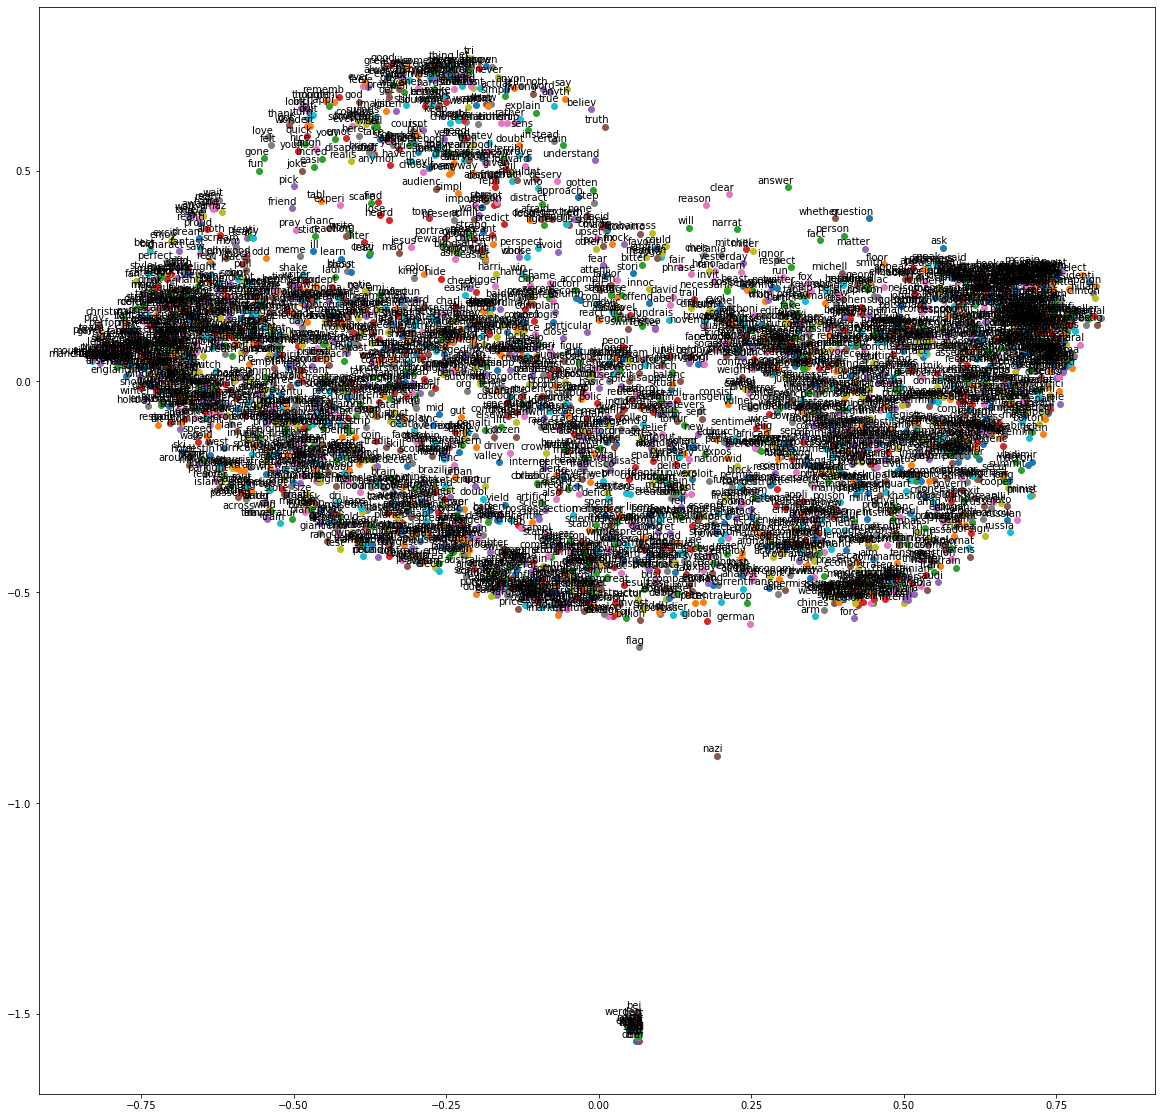

In [0]:
tsne_plot(train_w2v)

### TSNE plot for the complete test_news word2vector model

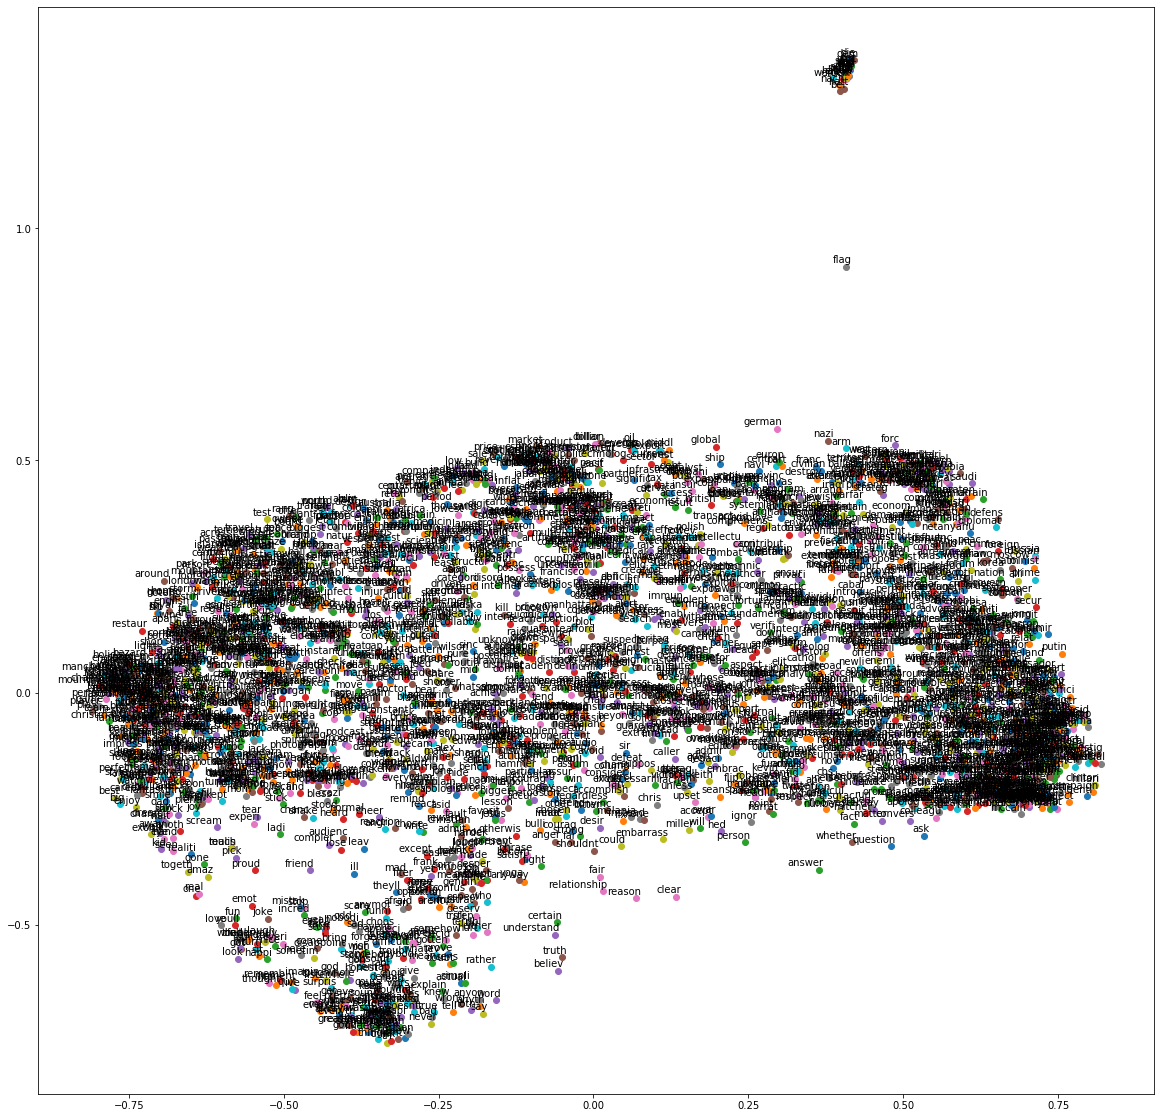

In [0]:
tsne_plot(test_w2v)

## Conclusion


1. Amalgamted NELA dataset consists of Doc2Vec inferred vector values of the NewsCoverage dataset, SensationalScores and NelaEncodedLabels 
2. TFIDF Multinomial Naive Bayes Algorithm was selected for the 3 features-<br>NelaEncodedLabel accuracy:  58%<br>NewsCoverageFeature  - accuracy:   48%<br>Sensational Feature - accuracy:   53%
3. Performance analysis of the valid news for Nela encoded label:<br>truePos= 1845<br>trueNeg= 640<br>falsePos= 68<br>falseNeg= 514<br>ignored= 917<br>accuracy= 78%  
4. Polynomial score of the 3 fearures came up to 63%
5. For a modular approach 3 classes were created:<br>NewsCoverage.py<br>SensationalPrediction.py<br>NelaEncodedLabelPrediction.py
6. Import packages were created for all these 3 classes.
7. Guard function was defined in the classes to create an instance to save the pkl files.
8. Import of the classes was done to directly to retun accuracy and predicted probability and input name. Pkl files were created when the python scripts were run without the imports. 